# 1

## 均方误差

In [3]:
from sklearn.metrics import mean_squared_error # MSE 均方误差
y_test    = [2,2,0,0,2]
y_predict = [0,2,0,0,0]

mean_squared_error(y_test,y_predict) # (4+0+0+0+4)/5=1.6

1.6

## 相关系数

In [5]:
## 相关系数计算
import numpy as np
X1 = np.array([65, 72, 78, 65, 72, 70, 65, 68])
X2 = np.array([72, 69, 79, 69, 84, 75, 60, 73])
print("np.corrcoef(X1, X2)=\n", np.corrcoef(X1, X2))
# The relationship between the correlation coefficient matrix, R, and the covariance matrix, C, is
# Rij = Cij/sqrt(Cii*Cjj)
print("np.cov(X1,X2)=\n", np.cov(X1,X2))
print("np.cov(X1)=\n",    np.cov(X1))
print("np.cov(X2)=\n",    np.cov(X2))

print(np.cov(X1,X2)/(np.sqrt(np.cov(X1)*np.cov(X2))))

# +__                    __+   +__              __+
# |corr(X1,X1), corr(X1,X2)|   |R(X1,X1), R(X1,X2)|
# |corr(X2,X1), corr(X2,X2)| = |R(X2,X1), R(X2,X2)|
# +__                    __+   +__              __+

import plotly.graph_objects as go
from plotly.subplots import make_subplots
f1 = make_subplots(rows=1, cols=1)
trace = go.Scatter(mode='markers',x=X1,y=X2,
                   opacity=0.5,
                   marker=dict(color='LightSkyBlue',size=10,line=dict(color='MediumPurple',width=2)),
                   name='Opacity 0.5')
f1.append_trace(trace, 1, 1)
f1.update_layout(height=500, 
                width=500, 
                title_text=f"cov(x1,x2)={np.corrcoef(X1, X2)[0][-1]}")
f1.show()
# f1.write_html(f'{eq_i}.html')

np.corrcoef(X1, X2)=
 [[1.         0.64897259]
 [0.64897259 1.        ]]
np.cov(X1,X2)=
 [[21.125      21.44642857]
 [21.44642857 51.69642857]]
np.cov(X1)=
 21.125
np.cov(X2)=
 51.69642857142857
[[0.6392461  0.64897259]
 [0.64897259 1.56434274]]


## 小提琴图

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


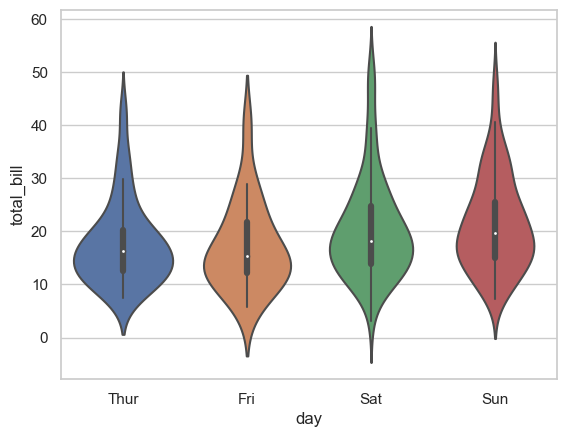

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
# 读取数据
tips = sns.load_dataset("tips")
print(tips)
"""
案例2：
绘制一个按分类变量分组的垂直小提琴图
"""
sns.violinplot(x="day", y="total_bill", data=tips)
plt.show()


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True)
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],orient='h')
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],orient='h')
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()

N = 10 ** 4
np.random.seed(42)
sample_gaussian = np.random.normal(loc=0, scale=0.1, size=N)
plot_comparison(sample_gaussian, 'Standard Normal Distribution')


C:\Users\Lip\AppData\Local\Temp\ipykernel_18224\3181720157.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




# 赛题-数据探索

### 查看数据 

.info(); .describe(); .head()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"
train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data  = pd.read_csv(test_data_file,  sep='\t', encoding='utf-8')

train_data.info() # 用于查看各特征及标签有无缺失
test_data.info()

# train_data.describe()
# test_data.describe()

# train_data.head() # 显示前5行
# test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

### Box plot

column=['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37']


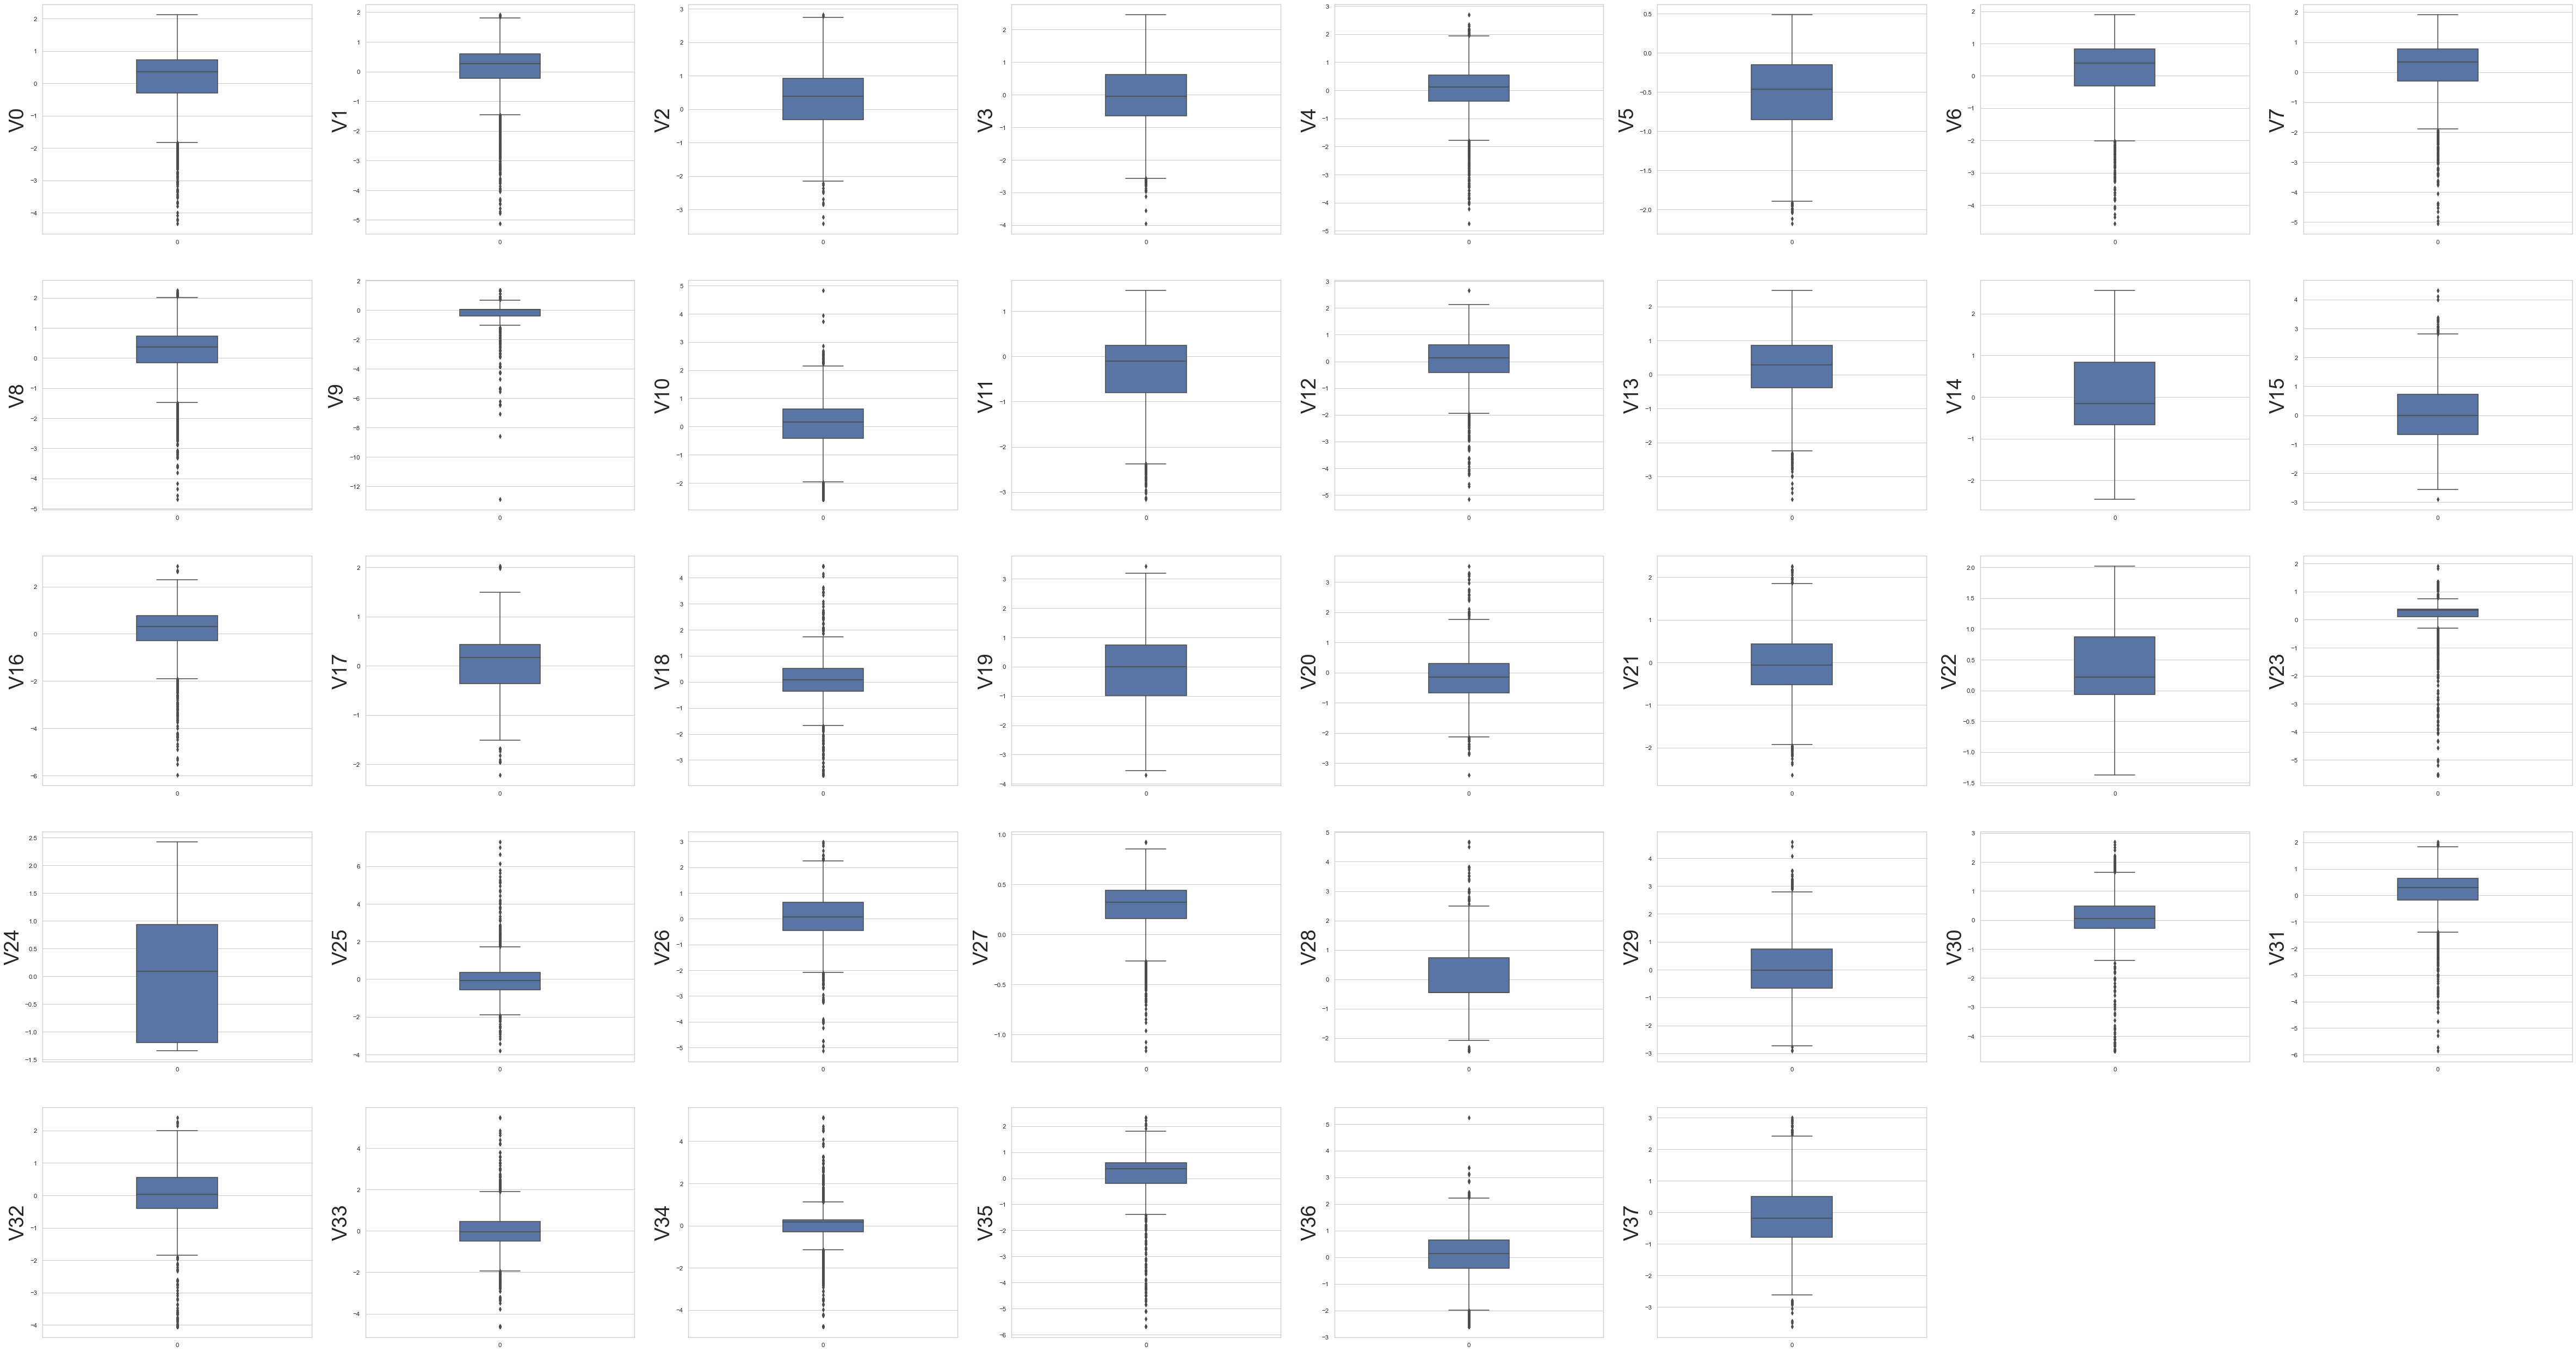

In [8]:
colNum = 38
column = train_data.columns.tolist()[:colNum]  # 各列表头, 第colNum列不包括在内
print(f"column={column}")
fig = plt.figure(figsize=(80,60), dpi=75) 
for i in range(colNum): # 生成[0,1,2,...,colNum]
    plt.subplot(7,8, i+1) # 7行8列子图
    sns.boxplot(train_data[column[i]], orient="v", width=0.3)
    plt.ylabel(column[i], fontsize=36)
plt.show()


### Q-Q图

将数据的分位数  与  正态分布的分位数  做对比参照的图

若数据符合正态分布，则数据点会落在直线上

'\nprobplot绘制Q-Q图\n红色线 由 “fit=True”控制\n其含义是：如果当前数据是正太分布，我们按正太分布拟合后，mu=0, mu+1sigma=1,...\n蓝色散点图则是我们实际数据的各个分位数quantile的值\n蓝色与红色吻合程度越高，说明该数据越符合当前的分布（默认是gaussian分布)\n'

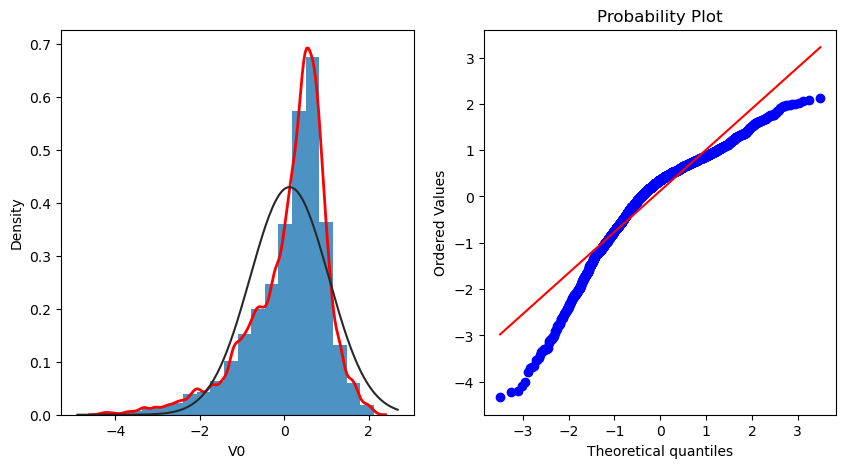

In [40]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.distplot(train_data['V0'], bins=20, hist_kws={"alpha":0.8}, kde_kws={'lw':2, 'color': 'red', 'bw':0.1}, fit=stats.norm)
'''
KDE: Kernal Density Estimation: estimate the probability density function
'''
ax = plt.subplot(1,2,2)
res = stats.probplot(train_data['V0'], dist='norm', fit=True, plot=plt)
'''
probplot绘制Q-Q图
红色线 由 “fit=True”控制
其含义是：如果当前数据是正太分布，我们按正太分布拟合后，mu=0, mu+1sigma=1,...
蓝色散点图则是我们实际数据的各个分位数quantile的值
蓝色与红色吻合程度越高，说明该数据越符合当前的分布（默认是gaussian分布)
'''

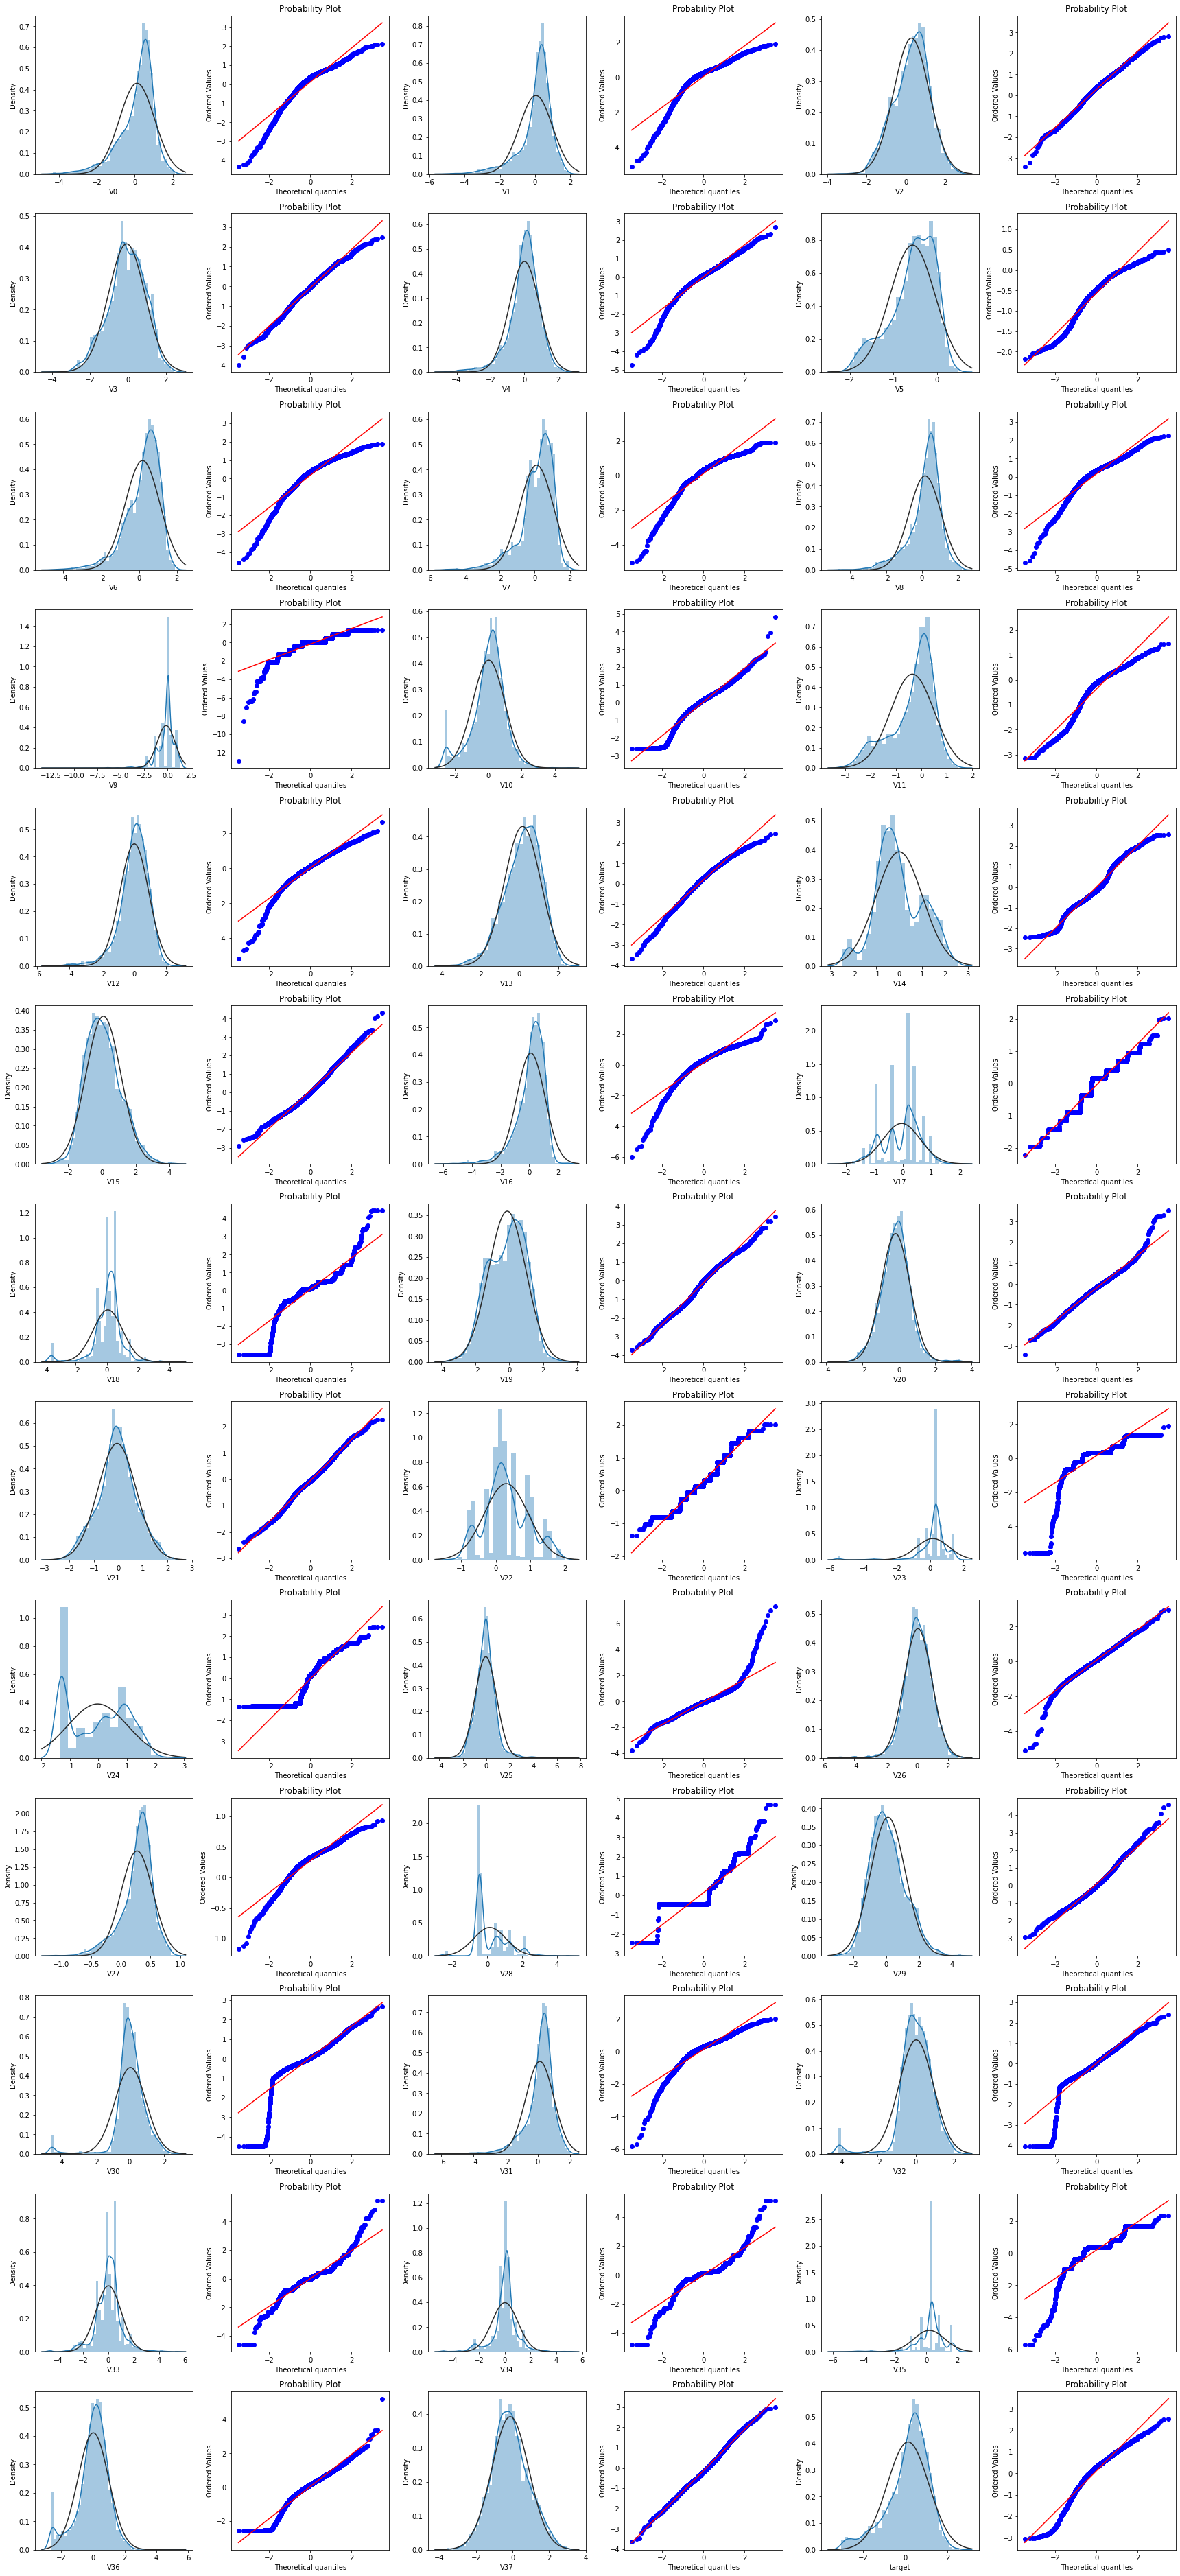

In [13]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols, 4*train_rows))
i = 0
for col in train_data.columns:
    i+=1
    ax=plt.subplot(train_rows, train_cols, i)
    sns.distplot(train_data[col],fit=stats.norm)
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col], plot=plt)
plt.tight_layout()
plt.show()

### KDE分布图

对直方图的加窗平滑

查看  训练集  与  测试集  中  相同特征的kde分布，如果不一致，可能导致训练的模型“泛化能力变差”

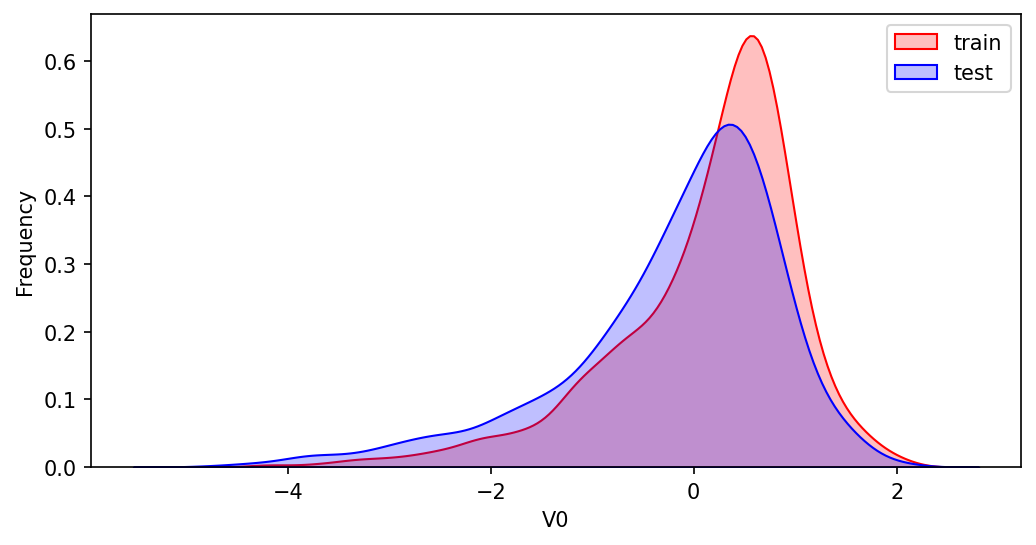

In [15]:
plt.figure(figsize=(8,4), dpi=150)
ax = sns.kdeplot(train_data['V0'], color="Red",  shade=True)
ax = sns.kdeplot(test_data['V0'],  color="Blue", shade=True)
ax.set_xlabel('V0')
ax.set_ylabel('Frequency')
ax = ax.legend(["train","test"])

38


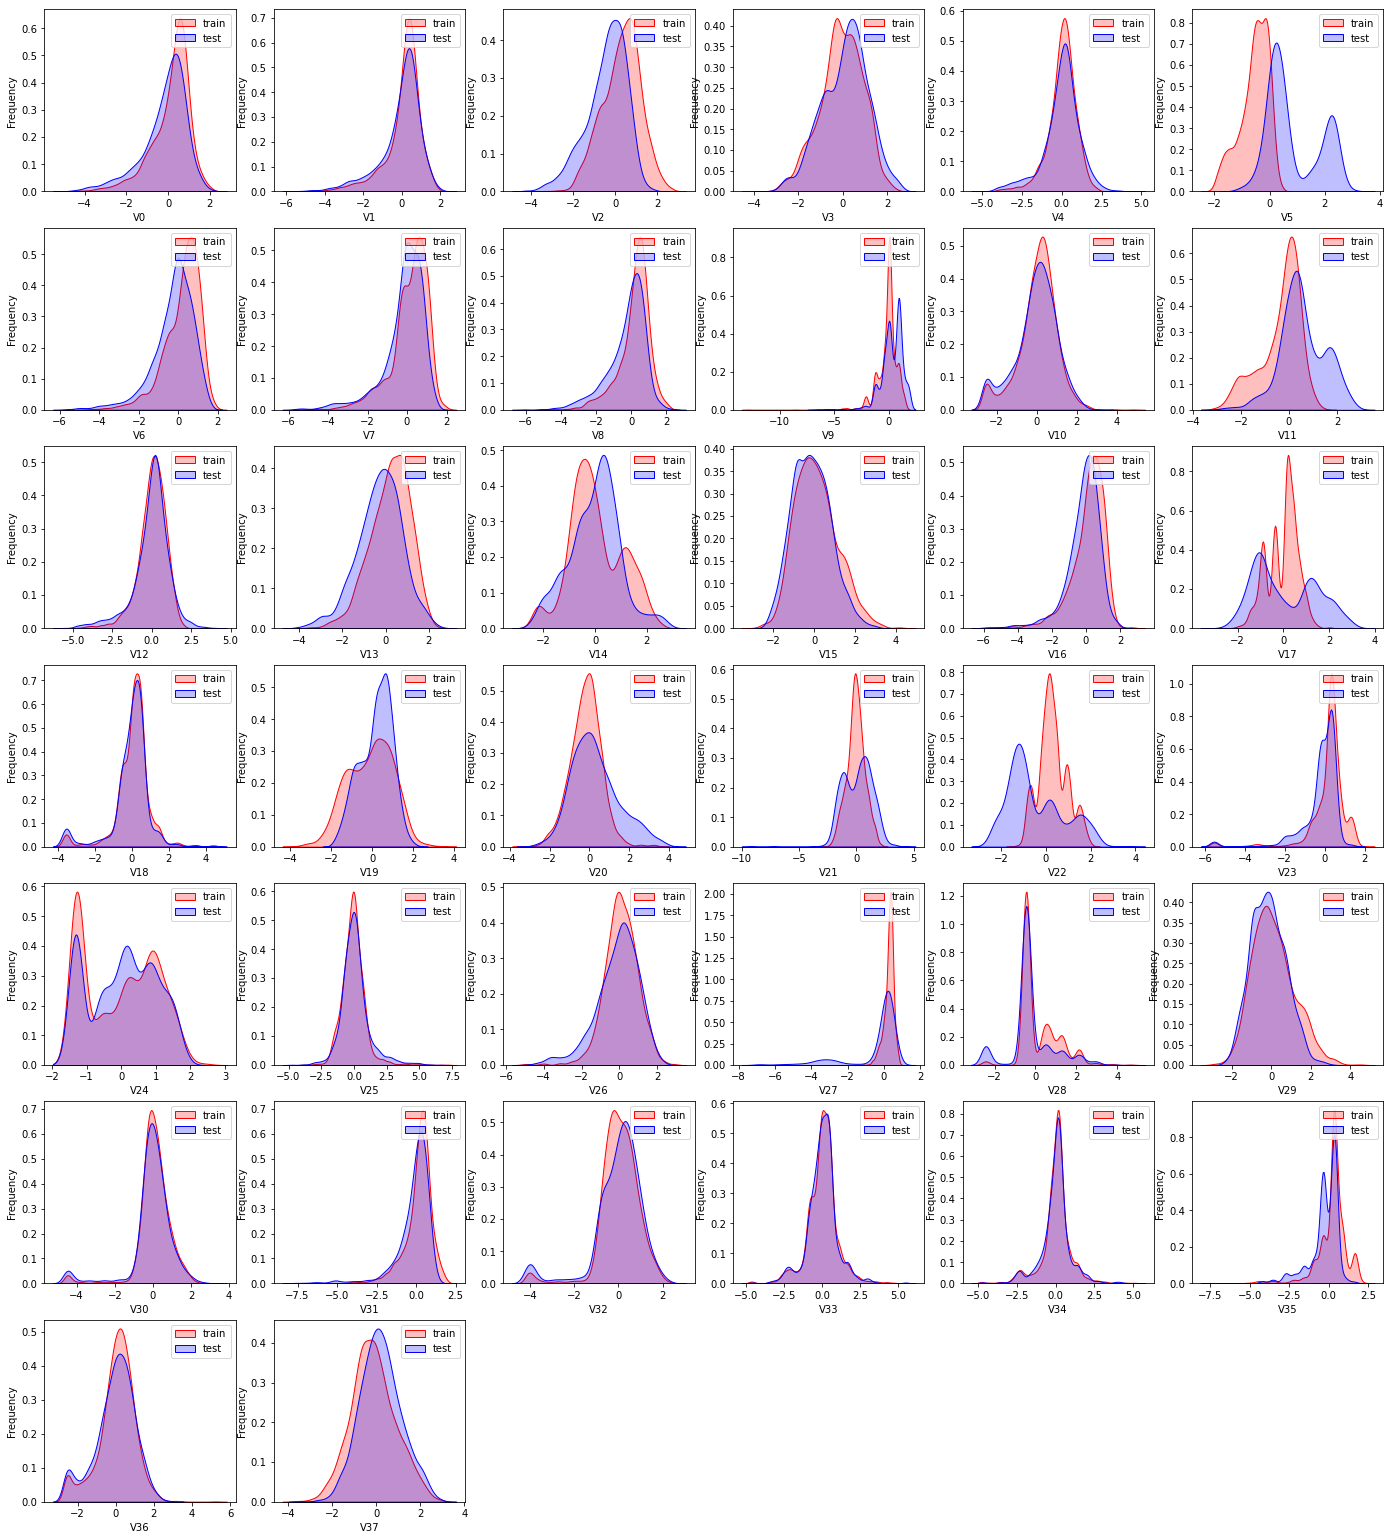

In [56]:
dist_cols = 6
dist_rows = len(test_data.columns)
print(dist_rows)
plt.figure(figsize=(4*dist_cols, 4*dist_rows))
i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i) # 虽然输入的38行，但最终显示时，没有画的子图位置不显示
    ax = sns.kdeplot(train_data[col], color="Red",  shade=True)
    ax = sns.kdeplot( test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(['train','test'])
    i += 1
plt.show()

### 线性回归关系图

查看各个特征  与  输出target字段  的线性关系

In [16]:
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols, 4*frows))

i=0
for col in test_data.columns:
    i+=1
    ax=plt.subplot(frows, fcols, i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax,
                ci=80,
                scatter_kws={'marker':'d','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    i+=1
    ax=plt.subplot(frows, fcols, i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

### 计算相关系数+热力图

In [17]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'], axis=1)
train_corr = data_train1.corr()
train_corr

V0        V1        V2        V3        V4  ...       V34  \
V0      1.000000  0.908607  0.463643  0.409576  0.781212  ... -0.019342   
V1      0.908607  1.000000  0.506514  0.383924  0.657790  ... -0.029115   
V2      0.463643  0.506514  1.000000  0.410148  0.057697  ... -0.025620   
V3      0.409576  0.383924  0.410148  1.000000  0.315046  ... -0.031898   
V4      0.781212  0.657790  0.057697  0.315046  1.000000  ...  0.028659   
...          ...       ...       ...       ...       ...  ...       ...   
V34    -0.019342 -0.029115 -0.025620 -0.031898  0.028659  ...  1.000000   
V35     0.138933  0.146329  0.043648  0.080034  0.100010  ...  0.233616   
V36     0.231417  0.235299  0.316462  0.324475  0.113609  ... -0.019032   
V37    -0.494076 -0.494043 -0.734956 -0.229613 -0.031054  ... -0.006854   
target  0.873212  0.871846  0.638878  0.512074  0.603984  ... -0.006034   

             V35       V36       V37    target  
V0      0.138933  0.231417 -0.494076  0.873212  
V1      0.146329  0.235299 -0.494043  0.871846  
V2      0.043648  0.316462 -0.734956  0.638878  
V3      0.080034  0.324475 -0.229613  0.512074  
V4      0.100010  0.113609 -0.031054  0.603984  
...          ...       ...       ...       ...  
V34     0.233616 -0.019032 -0.006854 -0.006034  
V35     1.000000  0.025401 -0.077991  0.140294  
V36     0.025401  1.000000 -0.039478  0.319309  
V37    -0.077991 -0.039478  1.000000 -0.565795  
target  0.140294  0.319309 -0.565795  1.000000  

[33 rows x 33 columns]

In [18]:
ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(train_corr, vmin=0,vmax=1.0, cmap="crest", square=True, annot=True)

### 筛选变量-基于相关系数

#### 排序筛选

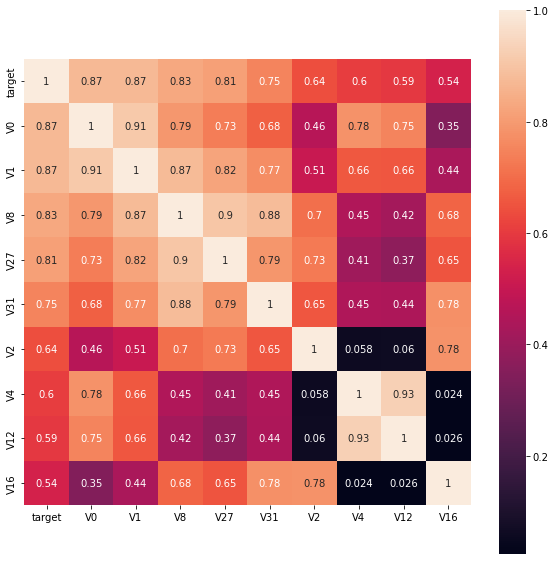

In [102]:
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'], axis=1)
train_corr = data_train1.corr()

## 注意train_corr本身是一个dataframe结构，data_train1也是，train_data也是

k=10

## 降序返回column中具有最大值的前n行，其本身还是一个dataframe，相当于对原有df做了截断，只截取前10行
t1 = train_corr.nlargest(n=k, columns='target')

## 先获取t1的['target']列，实际是一个series，提取这个series的index; 此处就是 与target相关系数 前10的特征的名称
cols = t1['target'].index
## data_train1[cols].values 将dataframe转为numpy
cm = np.corrcoef(data_train1[cols].values.T)
hm = plt.subplots(figsize=(10,10))
hm = sns.heatmap(data_train1[cols].corr(), annot=True, square=True)
# hm = sns.heatmap(cm,                     annot=True, square=True) # 直接用cm也行，但这样heatmap的标签不是V0/1/2/...


#### 取值筛选

Index(['V0', 'V1', 'V8', 'V27', 'V31', 'target'], dtype='object')


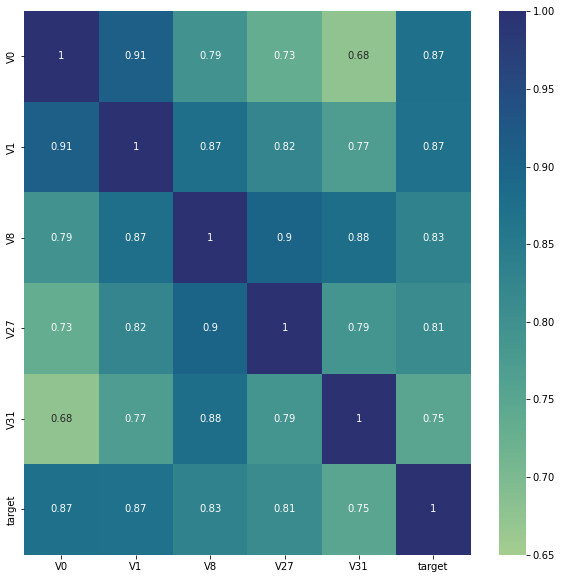

In [112]:
threshold=0.65
# #                  算train_data相关系数（注意矩阵是对称的），再从index中筛选
top_corr_features = (train_data.corr()).index[abs(train_data.corr()["target"]) > threshold]
print(top_corr_features)
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(),
                vmin=0.65,
                vmax=1,
                annot=True,
                # cmap="RdYlGn",
                cmap='crest'
                )

### Box-Cox变换

让非正态数据趋近正态

#### 归一化处理

Min-Max Normalization, 所有结果∈[0,1]

x'=(x-min(x))/(max(x)-min(x))

In [19]:
## 把 train_data 和 test_data 一上一下拼接起来
data_all = pd.concat([train_data.drop(['target'],axis=1), test_data])

data_all.drop(['V5', 'V9', 'V11', 'V17', 'V22', 'V28'], axis=1, inplace=True) # inplace即是否作用在当前df上
data_all.head()

cols_numeric = list(data_all.columns) # 获取data_all的所有列，并转为list

print(f"cols_numeric is {cols_numeric}")

def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax, axis=0)
data_all[cols_numeric].describe()

## 用下面2行也行 
# data_all = data_all.apply(scale_minmax, axis=0)
# data_all.describe()

cols_numeric is ['V0', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V13', 'V14', 'V15', 'V16', 'V18', 'V19', 'V20', 'V21', 'V23', 'V24', 'V25', 'V26', 'V27', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37']


V0           V1           V2           V3           V4  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.694172     0.721357     0.602300     0.603139     0.523743  ...   
std       0.144198     0.131443     0.140628     0.152462     0.106430  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626676     0.679416     0.514414     0.503888     0.478182  ...   
50%       0.729488     0.752497     0.617072     0.614270     0.535866  ...   
75%       0.790195     0.799553     0.700464     0.710474     0.585036  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V33          V34          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.458493     0.483790     0.762873     0.332385     0.545795  
std       0.099095     0.101020     0.102037     0.127456     0.150356  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.409037     0.454490     0.727273     0.270584     0.445647  
50%       0.454518     0.499949     0.800020     0.347056     0.539317  
75%       0.500000     0.511365     0.800020     0.414861     0.643061  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 32 columns]

#### Box-Cox

In [2]:
train_data_process = train_data[cols_numeric].apply(scale_minmax, axis=0)

test_data_process = test_data[cols_numeric].apply(scale_minmax, axis=0)

cols_numeric_left  = cols_numeric[0:-1]
# cols_numeric_left  = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]

train_data_process = pd.concat([train_data_process, train_data['target']], axis=1)

fcols = 6
frows = len(cols_numeric_left)
plt.figure(figsize=(4*fcols, 4*frows))
i = 0
for var in cols_numeric_left:
    dat = train_data_process[[var, 'target']].dropna()
    i+=1
    plt.subplot(frows, fcols, i)
    sns.distplot(dat[var], fit=stats.norm)                     #变换前，绘制 第i个特征 核密度图，做正态拟合并对比
    plt.title(var + 'Original')
    plt.xlabel('')
    i+=1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(dat[var], plot=plt)                     #变换前，绘制 第i个特征 Q-Q图
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
    i+=1
    plt.subplot(frows, fcols, i)
    plt.plot(dat[var], dat['target'], '.', alpha=0.5)         #变换前，绘制 第i个特征 与 target 的散点图
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
    #-----------------------------------------------------------------------------------------------------------
    #----进行Box-Cox变换
    #-----------------------------------------------------------------------------------------------------------
    i+=1
    plt.subplot(frows, fcols, i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1) 
    # If lmbda is None, array must be positive, 1-dimensional, and non-constant.
    # dat[var].dropna()+1是为了保证这个array整体非负（前面做了归一化处理，数值范围在[-1,1], +1后变成[0,2]），因为这里我们未指定lambda
    trans_var = scale_minmax(trans_var)
    sns.distplot(trans_var, fit=stats.norm)                  #变换'后'，绘制 第i个特征 核密度图，做正态拟合并对比
    plt.title(var+'Tramsformed')
    plt.xlabel('')
    i+=1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(trans_var, plot=plt)                  #变换'后'，绘制 第i个特征 Q-Q图
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
    i+=1
    plt.subplot(frows, fcols, i)
    plt.plot(trans_var, dat['target'], '.', alpha=0.5)      #变换'后'，绘制 第i个特征 与 target 的散点图
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var, dat['target'])[0][1]))

NameError: name 'train_data' is not defined

# 2 特征处理

## 特征处理-01 标准化

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.describe())

# 标准化，返回值为标准化后的数据
df_standard = pd.DataFrame(StandardScaler().fit_transform(iris.data), columns=iris.feature_names)
print(df_standard.describe())  # 可以看到，标准化后数据均值为0

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1

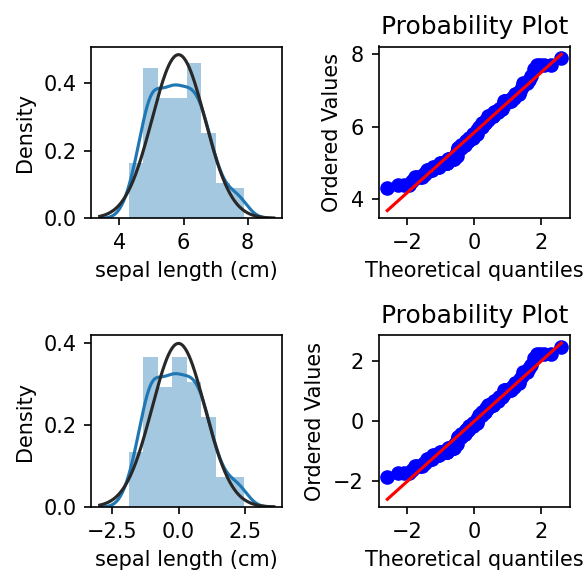

In [39]:
plt.figure(figsize=(4,4),dpi=150)

ax=plt.subplot(2, 2, 1)
sns.distplot(df['sepal length (cm)'],fit=stats.norm)
ax=plt.subplot(2, 2, 2)
_ =stats.probplot(df['sepal length (cm)'], dist='norm', fit=True, plot=plt)

## 标准化变换后

ax=plt.subplot(2, 2, 3)
sns.distplot(df_standard['sepal length (cm)'],fit=stats.norm)
ax=plt.subplot(2, 2, 4)
_ =stats.probplot(df_standard['sepal length (cm)'], dist='norm', fit=True, plot=plt)
plt.tight_layout()
plt.show()

## 特征处理-02 区间缩放（归一化的1种）

和前面Box-Cox提到的归一化处理类似，下面03就要提到，区间缩放是  归一化  的一种方式

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.describe())

# 区间缩放，返回值为缩放后的数据
df_standard = pd.DataFrame(MinMaxScaler().fit_transform(iris.data), columns=iris.feature_names)
print(df_standard.describe()) 

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556        

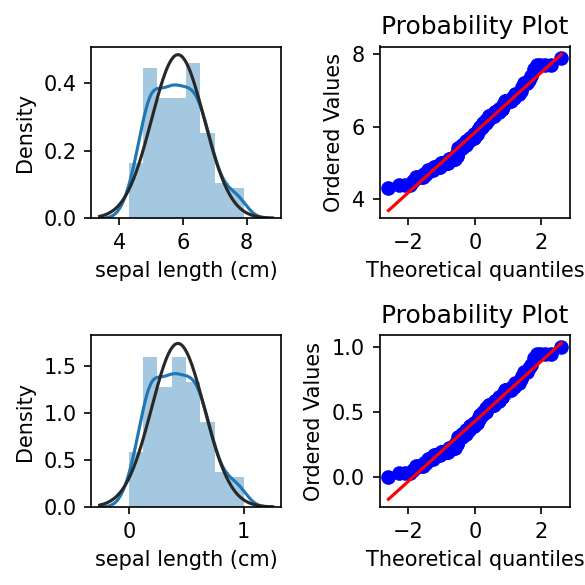

In [42]:
plt.figure(figsize=(4,4),dpi=150)

ax=plt.subplot(2, 2, 1)
sns.distplot(df['sepal length (cm)'],fit=stats.norm)
ax=plt.subplot(2, 2, 2)
_ =stats.probplot(df['sepal length (cm)'], dist='norm', fit=True, plot=plt)

## 区间缩放变换后，变换后对象在区间[0,1]之间

ax=plt.subplot(2, 2, 3)
sns.distplot(df_standard['sepal length (cm)'],fit=stats.norm)
ax=plt.subplot(2, 2, 4)
_ =stats.probplot(df_standard['sepal length (cm)'], dist='norm', fit=True, plot=plt)
plt.tight_layout()
plt.show()

## 特征处理-03 归一化

In [43]:
from sklearn.preprocessing import Normalizer
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.describe())

# L2归一化，返回值为归一化后的数据
df_standard = pd.DataFrame(Normalizer().fit_transform(iris.data), columns=iris.feature_names)
print(df_standard.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.751400          0.405174        

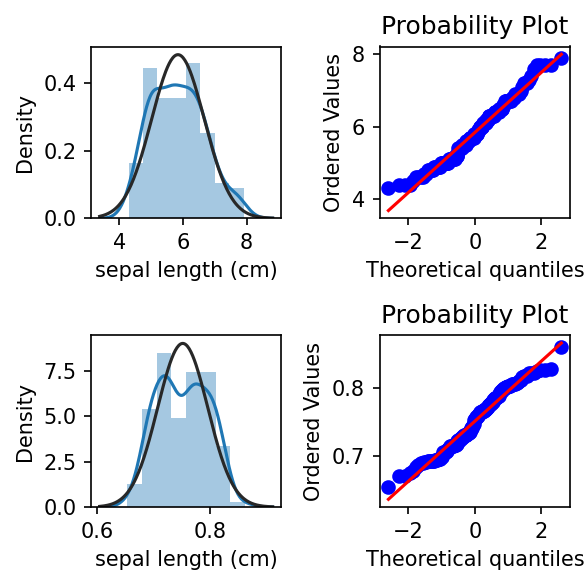

In [44]:
plt.figure(figsize=(4,4),dpi=150)

ax=plt.subplot(2, 2, 1)
sns.distplot(df['sepal length (cm)'],fit=stats.norm)
ax=plt.subplot(2, 2, 2)
_ =stats.probplot(df['sepal length (cm)'], dist='norm', fit=True, plot=plt)

## 归一化变换后

ax=plt.subplot(2, 2, 3)
sns.distplot(df_standard['sepal length (cm)'],fit=stats.norm)
ax=plt.subplot(2, 2, 4)
_ =stats.probplot(df_standard['sepal length (cm)'], dist='norm', fit=True, plot=plt)
plt.tight_layout()
plt.show()

## 特征处理-04 定量特征二值化

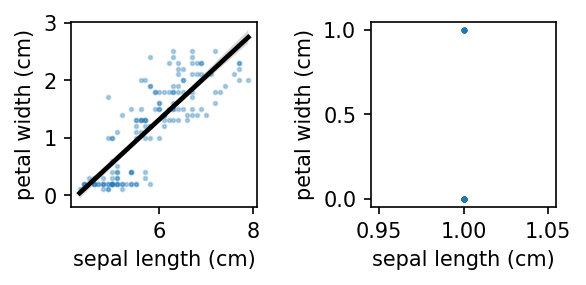

In [49]:
from sklearn.preprocessing import Binarizer
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
# print(df.describe())

df_standard = pd.DataFrame(Binarizer(threshold=2).fit_transform(iris.data), columns=iris.feature_names)
# print(df_standard.describe())

plt.figure(figsize=(4,2),dpi=150)

ax=plt.subplot(1, 2, 1)
sns.regplot(x='sepal length (cm)', y='petal width (cm)', data=df, ax=ax,
                ci=80,
                scatter_kws={'marker':'d','s':3,'alpha':0.3},
                line_kws={'color':'k'});

## 二值化变换后

ax=plt.subplot(1, 2, 2)
sns.regplot(x='sepal length (cm)', y='petal width (cm)', data=df_standard, ax=ax,
                ci=80,
                scatter_kws={'marker':'x','s':3,'alpha':0.3},
                line_kws={'color':'k'});
plt.tight_layout()
plt.show()

## 特征处理-05 哑编码

In [50]:
from sklearn.preprocessing import OneHotEncoder

## 特征处理-06 缺失值处理

In [11]:
from numpy import vstack, array, nan
from sklearn.impute import SimpleImputer

from sklearn.datasets import load_iris
iris = load_iris()

new_data = pd.DataFrame(vstack((array([nan,nan,nan,nan]), iris.data) ),columns=iris.feature_names)

new_data_change = pd.DataFrame(SimpleImputer(missing_values=nan, strategy='mean').fit_transform(new_data), 
                               columns=iris.feature_names)
# print(new_data.head())
print(new_data.describe())
print(new_data_change.head()) # 可以看到第一行的nan被换成了数据，这些数据就是各列的mean

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.843333          3.057333              3.758          1.199333
1           5.100000        

## 特征处理-07 数据转换

In [65]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.describe())

from sklearn.preprocessing import PolynomialFeatures # 多项式转换

# 多项式转换
df_standard = pd.DataFrame(PolynomialFeatures().fit_transform(iris.data))
print(df_standard.describe()) # 原本的4个特征会被扩充，形成15个特征

# (x1', x2', x3', x4', x5', x6',  x7',   x8',   x9',   x10', x11', x12',   x13', x14',  x15')
# = (1, x1,  x2,  x3,  x4,  x1^2, x1*x2, x1*x3, x1*x4, x2^2, x2*x3, x2*x4, x3^2, x3*x4,  x4^2)


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
          0           1           2           3           4   ...          10  \
count  150.0  150.000000  150.000000  150.000000  150.000000  ...  150.000000   
mean     1.0    5.

In [68]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.describe())

from sklearn.preprocessing import FunctionTransformer # 自定义函数转换

# 自定义函数转换,第一个参数是指定的函数
from numpy import log1p
df_standard = pd.DataFrame(FunctionTransformer(log1p, validate=False).fit_transform(iris.data))
print(df_standard.describe()) #

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     1.916064    1.394823    1.476975    0.720110
std      0.120352 

# 3 特征降维

## 特征降维--选择/线降

### 特征选择-01 方差选择

In [70]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.describe())

from sklearn.feature_selection import VarianceThreshold
df_standard = pd.DataFrame(VarianceThreshold(threshold=0.5).fit_transform(iris.data))
print(df_standard) # 可见选择了原数据中 的第1/3/4列，因为这3列的方差大于0.5

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
       0    1    2
0    5.1  1.4  0.2
1    4.9  1.4  0.2
2    4.7  1.3  0.2
3    4.6  1.5  0.2
4    5.0  1.4  0.2
..   ...  ...  ...
145  6.7  5.2  2.3
146  6.3  5.0  1.9
147  6.5 

### 特征选择-02 SelectKBest

#### 02-1 相关系数法

pearsonr

In [1]:
import numpy as np
from scipy import stats
res = stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4], alternative='two-sided')
print(f"statistic={res[0]}, pvalue={res[1]}")
print(f"res.confidence_interval()={res.confidence_interval()}")

statistic=-0.7426106572325057, pvalue=0.1505558088534455
res.confidence_interval()=ConfidenceInterval(low=-0.9816918044786463, high=0.40501116769030976)


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

import numpy as np
from array import array
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr

df_standard = pd.DataFrame(SelectKBest(
    lambda X, Y: np.array(list(map(lambda x: pearsonr(x, Y), X.T))).T[0],
    k=2
).fit_transform(iris.data, iris.target))

print(df_standard.head())
## lambda X, Y: np.array(list(map(lambda x: pearsonr(x, Y), X.T))).T[0]
'''
这个函数接受2个参数X,Y，进行计算时，采用map函数，对X.T的每一行，分别与Y进行pearsonr计算
pearsonr返回的是2个数据：相关系数，p值(p值即假设检验，若p<0.05,则拒绝原假设H0)
所以最后写了.T[0]，[0]即相关系数，[1]即p值

需要理解的是，SelectKBest接受一个算分函数，还有k，然后算分排序后，会将满足条件的前k个特征进行返回
'''

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     0    1
0  1.4  0.2
1  1.4  0.2
2  1.3  0.2
3  1.5  0.2
4  1.4  0.2


'\n这个函数接受2个参数X,Y，进行计算时，采用map函数，对X.T的每一行，分别与Y进行pearsonr计算\npearsonr返回的是2个数据：相关系数，p值(p值即假设检验，若p<0.05,则拒绝原假设H0)\n所以最后写了.T[0]，[0]即相关系数，[1]即p值\n\n需要理解的是，SelectKBest接受一个算分函数，还有k，然后算分排序后，会将满足条件的前k个特征进行返回\n'

fit, transform, fit_transform

In [15]:
from sklearn import preprocessing   
import numpy as np    
X = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])
#创建一个数据规约的对象，然后拟合数据 
scaler = preprocessing.StandardScaler().fit(X)
# output: StandardScaler(copy=True, with_mean=True, with_std=True) 

#计算出原数据中每个特征（列）的均值 
print(scaler.mean_)
#计算出原数据中每个特征（列）的标准差 
print(scaler.var_)
scaler.transform(X)

'''所以从上边的代码中可以看出：
fit的作用在于到数据中去学习，得到数据的均值和标准差。
transform的作用在于按照学习到的均值和标准差对新的数据进行标准化'''

# https://nianshiqiang.github.io/2018/05/31/sklearn-%E6%95%B0%E6%8D%AE%E9%A2%84%E5%A4%84%E7%90%86%E5%87%BD%E6%95%B0fit,transform%E5%92%8Cfit_transform%E7%9A%84%E5%8C%BA%E5%88%AB/

[1.         0.         0.33333333]
[0.66666667 0.66666667 1.55555556]


'所以从上边的代码中可以看出：\nfit的作用在于到数据中去学习，得到数据的均值和标准差。\ntransform的作用在于按照学习到的均值和标准差对新的数据进行标准化'

#### 02-2 卡方检验

In [16]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df_standard = pd.DataFrame(SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target))
print(df_standard.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     0    1
0  1.4  0.2
1  1.4  0.2
2  1.3  0.2
3  1.5  0.2
4  1.4  0.2


#### 02-3 最大信息系数法

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

from sklearn.feature_selection import SelectKBest
from minepy import MINE

def mic(x,y):
    m = MINE()
    m.compute_score(x,y)
    return (m.mic(),0.5)

df_standard = pd.DataFrame(SelectKBest(
    lambda X, Y: np.array(list(map(lambda x: mic(x, Y), X.T))).T[0],
    k=2
).fit_transform(iris.data, iris.target))

print(df_standard.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     0    1
0  1.4  0.2
1  1.4  0.2
2  1.3  0.2
3  1.5  0.2
4  1.4  0.2


## 特征选择-03 RFE recursive feature elimination

递归消除特征法  使用一个基模型来进行多轮训练，每轮训练后，消除若干权值系数的特征

再基于新的特征集进行下一轮训练

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df_standard = pd.DataFrame(
    RFE(estimator=LogisticRegression(multi_class='auto',
                                     solver='lbfgs',
                                     max_iter=500),
    n_features_to_select=2).fit_transform(iris.data, iris.target)
)

print(df_standard.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     0    1
0  1.4  0.2
1  1.4  0.2
2  1.3  0.2
3  1.5  0.2
4  1.4  0.2


## 特征选择-04 SelectFromModel

包括：1)基于惩罚项的特征选择法；2) 基于树模型的特征选择法

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

'''基于惩罚项的特征选择法'''

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

df_standard = pd.DataFrame(
    SelectFromModel(LogisticRegression(multi_class='auto', 
                                       penalty='l2', 
                                       C=0.1, 
                                       solver='lbfgs')).fit_transform(iris.data, iris.target))

print(df_standard.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     0    1
0  1.4  0.2
1  1.4  0.2
2  1.3  0.2
3  1.5  0.2
4  1.4  0.2


In [21]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

'''基于树模型的特征选择法'''

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

df_standard = pd.DataFrame(
    SelectFromModel(GradientBoostingClassifier()).fit_transform(iris.data, iris.target))

print(df_standard.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     0    1
0  1.4  0.2
1  1.4  0.2
2  1.3  0.2
3  1.5  0.2
4  1.4  0.2


'\n画这个热力图，是为了解释，前面用了这么多方法筛选，基本都是选的后2列特征，部分原因就是它们的相关系数更大\n'

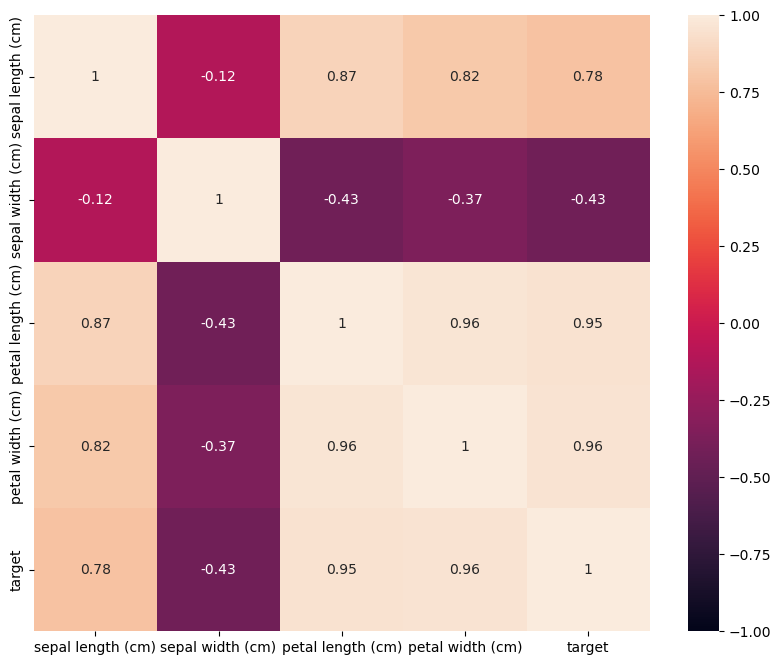

In [17]:
iris_all = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_all['target']=iris.target

ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(iris_all.corr(), vmin=-1.0, vmax=1.0, square=True, annot=True)

'''
画这个热力图，是为了解释，前面用了这么多方法筛选，基本都是选的后2列特征，部分原因就是它们的相关系数更大
'''

## 线性降维-01 主成分分析PCA

Principal component analysis

quick summary:
二维空间的散点(X,Y)，进行空间基向量的变换，可以变成一维空间的点(X*,Y*=0)

PCA要做的就是找到这个基向量变换，同时X*的方差尽量大（样本间的变化程度尽量大）
                              但另一个特征Y*接近0，在样本件无差异，所以这个特征可以被舍去
https://www.matongxue.com/madocs/1025/

In [36]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

from sklearn.decomposition import PCA
df_standard = pd.DataFrame(PCA(n_components=2).fit_transform(iris.data))
print(df_standard.head()) # 数值也不同了，主要就是做了基变换的原因



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
          0         1
0 -2.684126  0.319397
1 -2.714142 -0.177001
2 -2.888991 -0.144949
3 -2.745343 -0.318299
4 -2.728717  0.326755


In [38]:
pca = PCA(n_components=4)
pca.fit_transform(iris.data)

print(pca.explained_variance_ratio_) # 获得各个特征的方差占比，所有特征方差ratio之和=1

print(pca.get_feature_names_out(iris.feature_names)) # 获得筛选后特征的名称
pca.inverse_transform(pca.fit_transform(iris.data))  # 将变换后的数据变换回去

[0.92461872 0.05306648 0.01710261 0.00521218]
['pca0' 'pca1' 'pca2' 'pca3']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## 线性降维-02 线性判别法LDA

In [39]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
df_standard = pd.DataFrame(
    LDA(n_components=2).fit_transform(iris.data, iris.target)
)
print(df_standard.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
          0         1
0  8.061800  0.300421
1  7.128688 -0.786660
2  7.489828 -0.265384
3  6.813201 -0.670631
4  8.132309  0.514463


# 赛题-特征工程

### 01 异常值分析

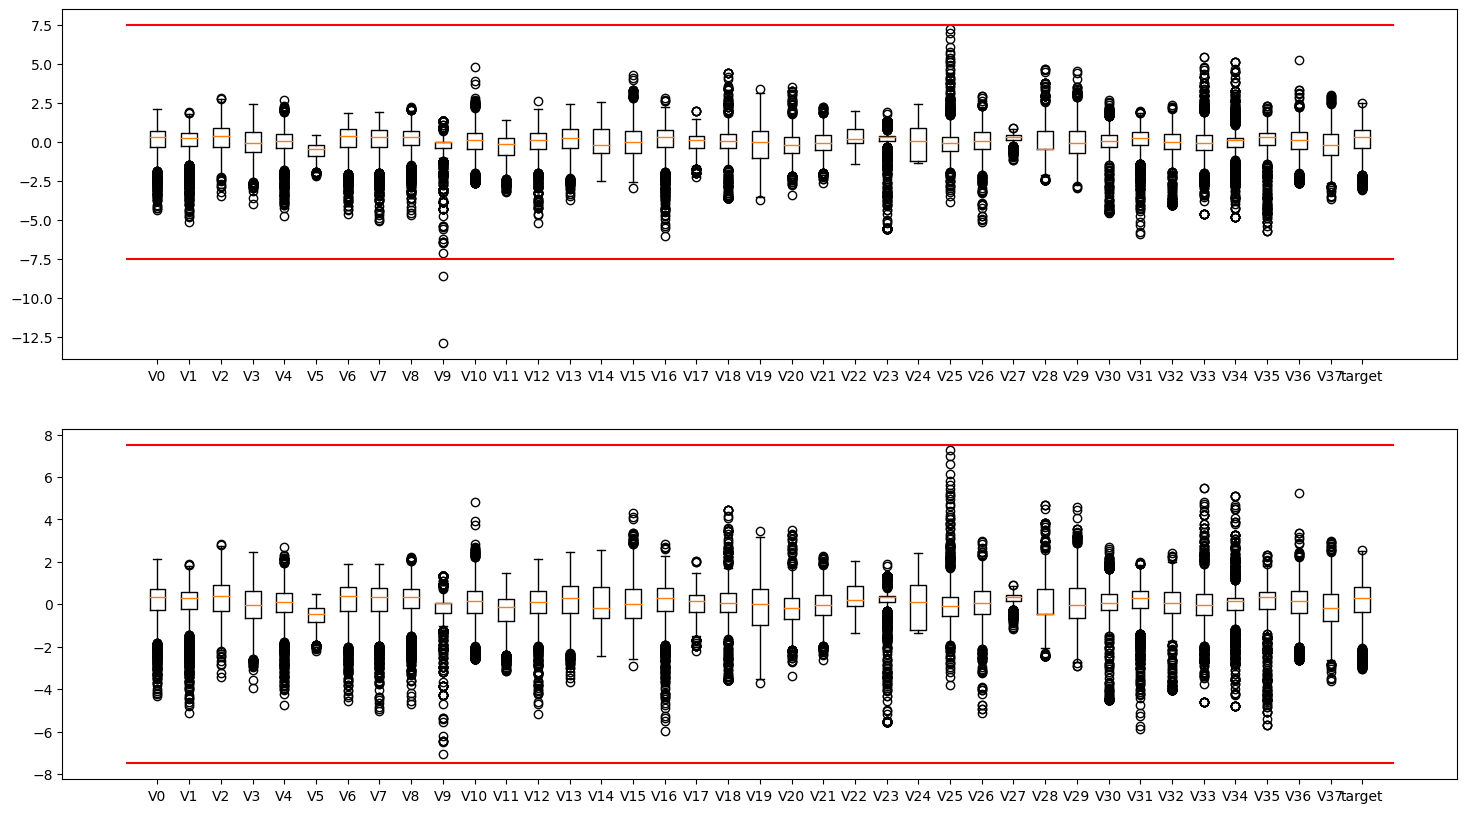

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"
train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data  = pd.read_csv(test_data_file,  sep='\t', encoding='utf-8')

## ------------------------------------------------------------------------ ##
## ------------------01 异常值分析------------------------------------------ ##
## ------------------------------------------------------------------------ ##
plt.figure(figsize=(18,10))
plt.subplot(211)
plt.boxplot(x=train_data.values, labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
# V9变量的outlier明显，有很多小于-7.5的数据，把这些数据删除
train_data = train_data[train_data['V9']>-7.5]
test_data = test_data[test_data['V9']>-7.5]

plt.subplot(212)
plt.boxplot(x=train_data.values, labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()


### 02 MinMax归一化

In [45]:

## ------------------------------------------------------------------------ ##
## ------------------02 MinMax归一化 --------------------------------------- ##
## ------------------------------------------------------------------------ ##
from sklearn.preprocessing import MinMaxScaler

feature_columns = [col for col in train_data.columns if col not in ['target']]

# train_data_scaler的index一定要指定为train_data的index，因为前面train_data做了删行操作，index不连续
# 如果不修改train_data_scaler的index，则会出现错位，进而使得下面进行赋予操作时
# train_data['target']的index与train_data_scaler的index有错位，进而target字段有空值

# train_data_scaler = pd.DataFrame(MinMaxScaler().fit_transform(train_data[feature_columns]), columns=feature_columns, index=train_data.index)
# train_data_scaler['target'] = train_data['target']
# test_data_scaler  = pd.DataFrame(MinMaxScaler().fit_transform(test_data[feature_columns]),  columns=feature_columns, index=test_data.index)

train_data_scaler = pd.DataFrame(MinMaxScaler().fit_transform(train_data[feature_columns]), columns=feature_columns)
train_data_scaler['target'] = train_data['target']
test_data_scaler  = pd.DataFrame(MinMaxScaler().fit_transform(test_data[feature_columns]),  columns=feature_columns)



display(train_data_scaler.describe())
display(test_data_scaler.describe())



V0           V1           V2           V3           V4  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.690633     0.735633     0.593844     0.606212     0.639787   
std       0.143740     0.133703     0.145844     0.151311     0.119504   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626239     0.695703     0.497759     0.515087     0.586328   
50%       0.727153     0.766335     0.609155     0.609855     0.652873   
75%       0.783922     0.812642     0.694422     0.714096     0.712152   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V5           V6           V7           V8           V9  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.607649     0.735477     0.741354     0.702053     0.821897  ...   
std       0.193887     0.141896     0.137154     0.129098     0.108362  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.497566     0.659249     0.682314     0.653489     0.794789  ...   
50%       0.642456     0.767192     0.774189     0.728557     0.846181  ...   
75%       0.759266     0.835690     0.837030     0.781029     0.846181  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V29          V30          V31          V32          V33  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.401631     0.634466     0.760495     0.632231     0.459302   
std       0.141594     0.124279     0.110938     0.139037     0.099799   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.300053     0.587132     0.722593     0.565757     0.409037   
50%       0.385611     0.633894     0.782330     0.634770     0.454518   
75%       0.488121     0.694136     0.824949     0.714950     0.504261   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2884.000000  
mean      0.484489     0.734944     0.336235     0.527608     0.127274  
std       0.101365     0.122840     0.123663     0.153192     0.983462  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.454490     0.685279     0.279792     0.427036    -0.348500  
50%       0.499949     0.755580     0.349860     0.519457     0.313000  
75%       0.511365     0.785260     0.414447     0.621870     0.794250  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 39 columns]

V0           V1           V2           V3           V4  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean      0.669597     0.710316     0.617794     0.574531     0.521693   
std       0.155240     0.141518     0.155649     0.176038     0.122104   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.600231     0.662066     0.530583     0.447695     0.470839   
50%       0.705670     0.746977     0.644726     0.594659     0.536292   
75%       0.775673     0.798764     0.732220     0.692125     0.588655   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V5           V6           V7           V8           V9  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.461798     0.748907     0.776610     0.684102     0.823288  ...   
std       0.221695     0.146875     0.148184     0.128253     0.118643  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.296961     0.685105     0.728879     0.624070     0.747836  ...   
50%       0.369475     0.775672     0.803961     0.715129     0.840351  ...   
75%       0.712707     0.850773     0.874768     0.772529     0.899181  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V28          V29          V30          V31          V32  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean      0.314219     0.417026     0.578575     0.822515     0.633452   
std       0.150069     0.162023     0.147321     0.124748     0.177821   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.279509     0.293468     0.545122     0.791365     0.564034   
50%       0.280637     0.407360     0.590766     0.854482     0.662681   
75%       0.282189     0.530083     0.647920     0.895135     0.736941   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean      0.457349     0.482778     0.784882     0.468409     0.556264  
std       0.098071     0.100537     0.103509     0.190319     0.147730  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.412901     0.454490     0.779187     0.368440     0.457672  
50%       0.454518     0.499949     0.787822     0.492046     0.549395  
75%       0.500000     0.511365     0.857127     0.595904     0.650699  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 38 columns]

### 03 删除分布不一致特征

38


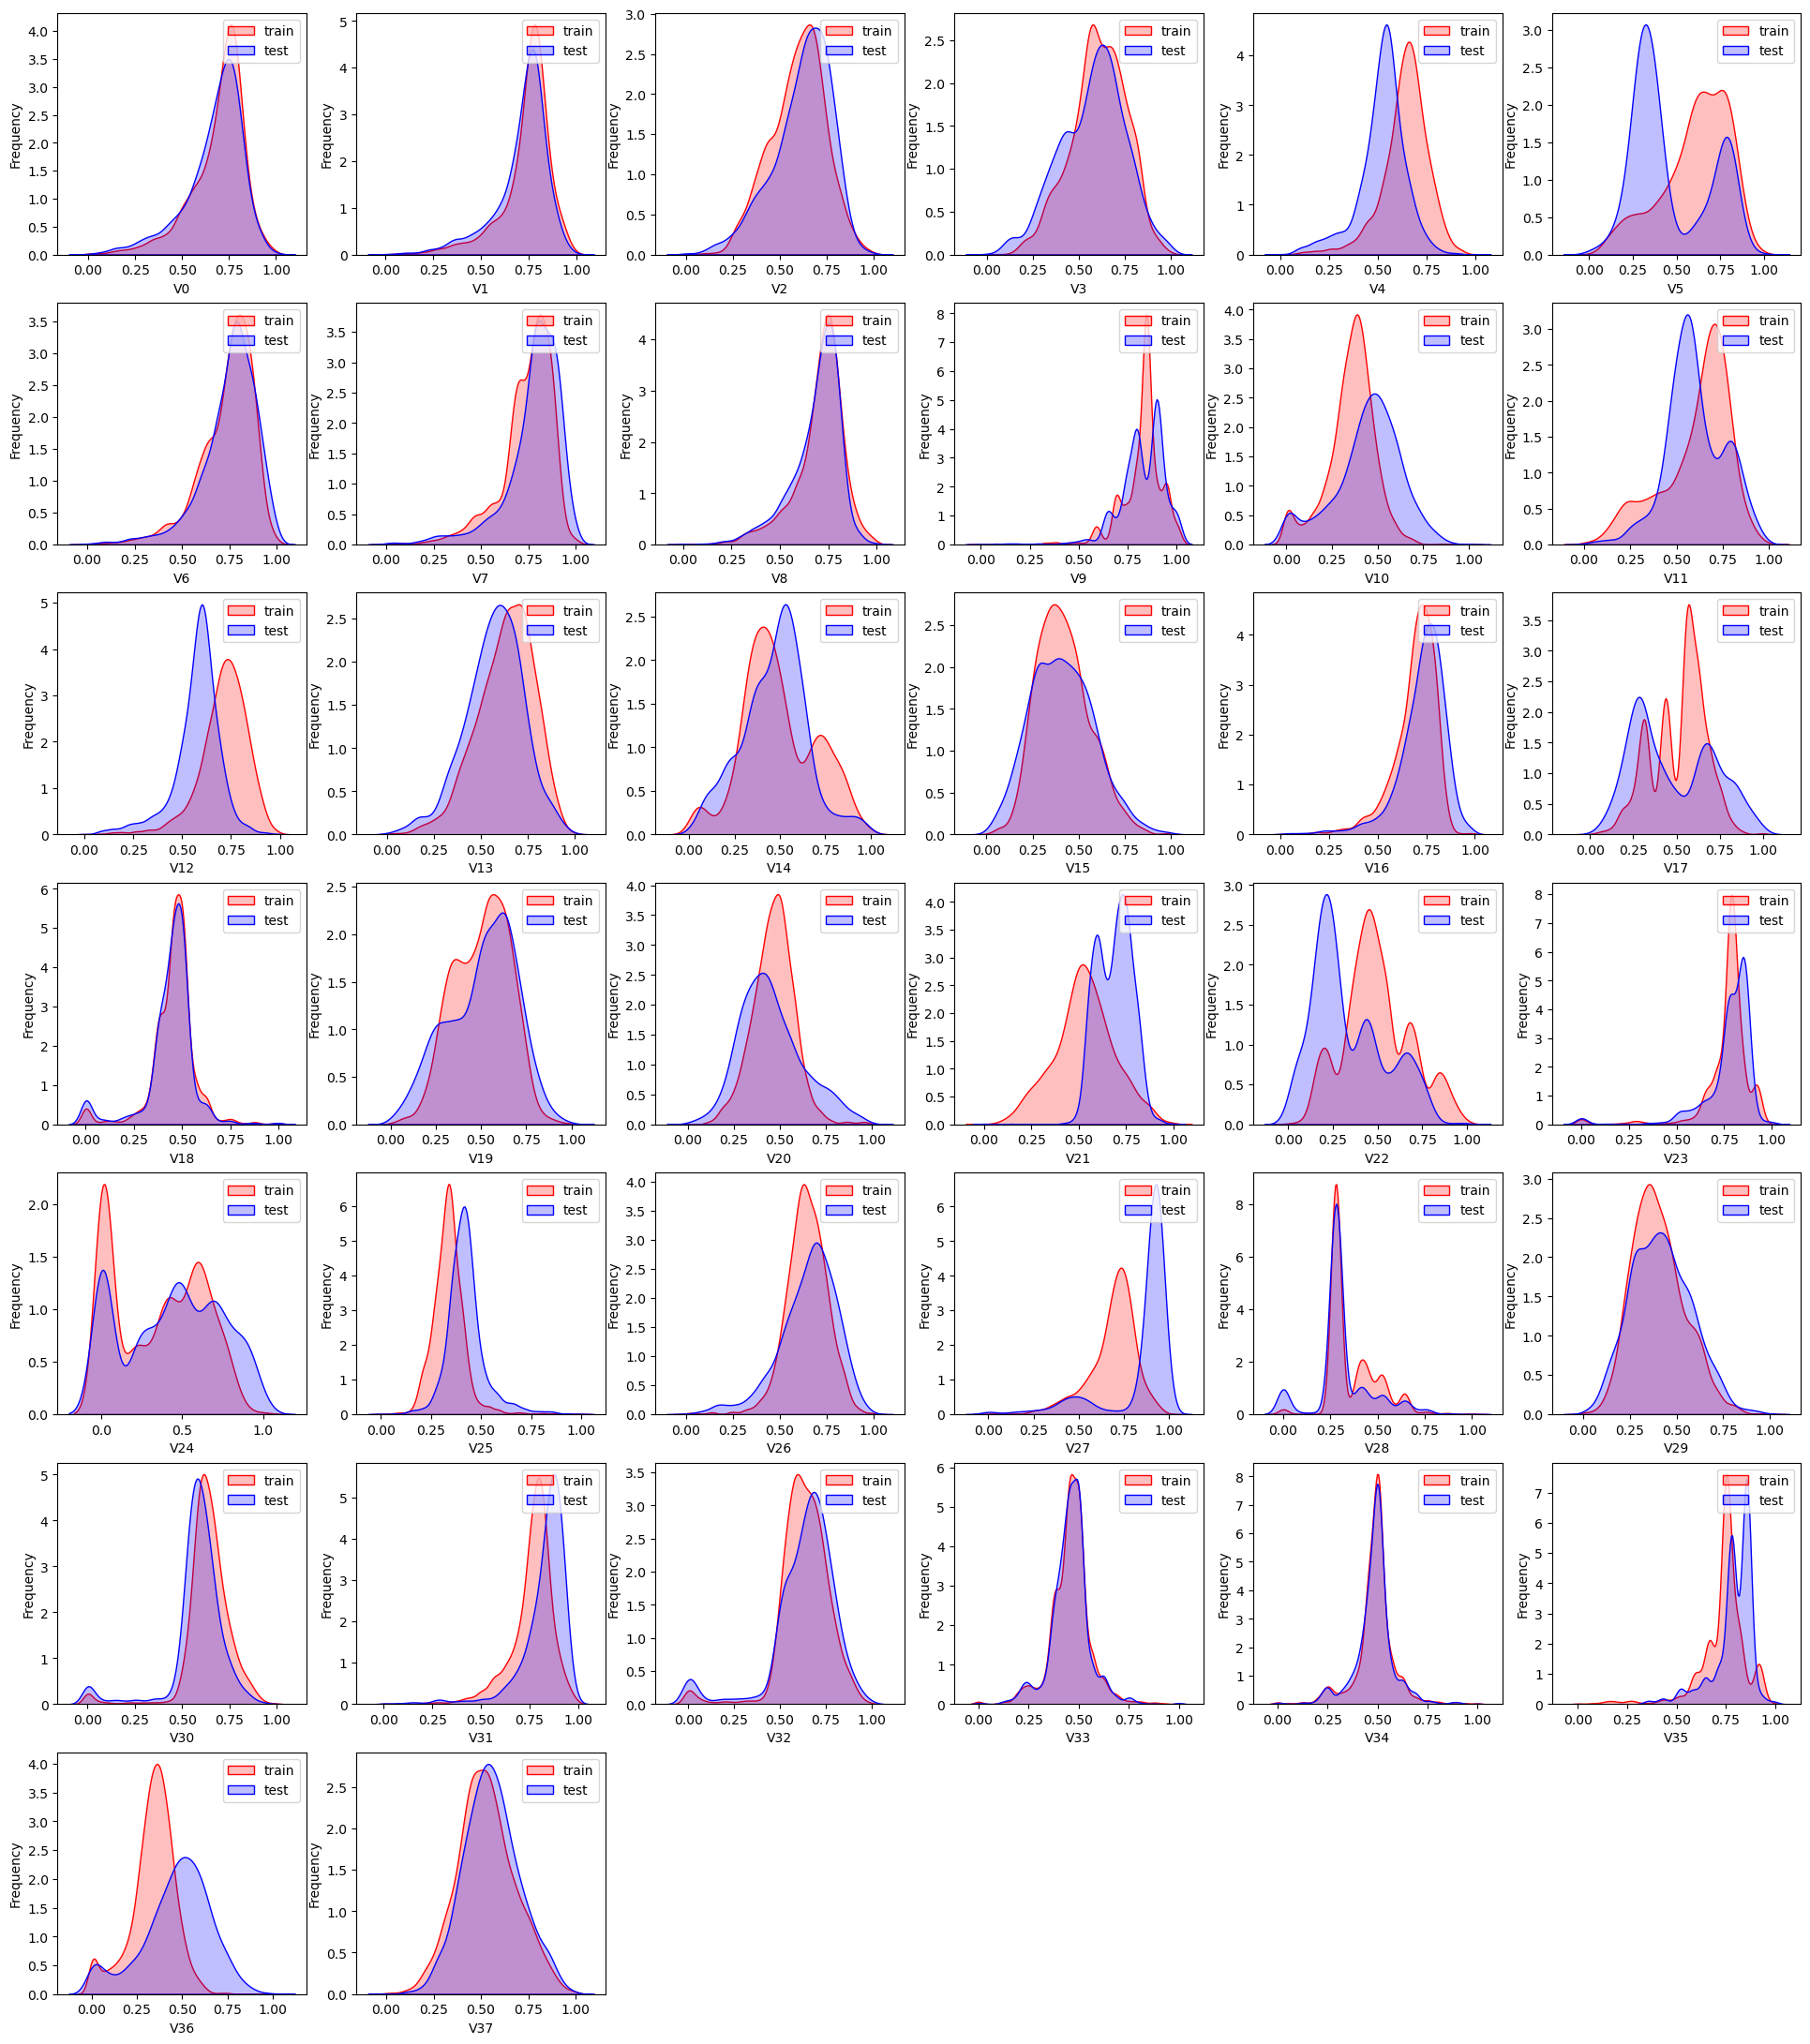

V0           V1           V2           V3           V4  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.690633     0.735633     0.593844     0.606212     0.639787   
std       0.143740     0.133703     0.145844     0.151311     0.119504   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626239     0.695703     0.497759     0.515087     0.586328   
50%       0.727153     0.766335     0.609155     0.609855     0.652873   
75%       0.783922     0.812642     0.694422     0.714096     0.712152   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.735477     0.741354     0.702053     0.353182     0.711946  ...   
std       0.141896     0.137154     0.129098     0.130372     0.122571  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.659249     0.682314     0.653489     0.291880     0.651386  ...   
50%       0.767192     0.774189     0.728557     0.369706     0.725775  ...   
75%       0.835690     0.837030     0.781029     0.432021     0.793405  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V29          V30          V31          V32          V33  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.401631     0.634466     0.760495     0.632231     0.459302   
std       0.141594     0.124279     0.110938     0.139037     0.099799   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.300053     0.587132     0.722593     0.565757     0.409037   
50%       0.385611     0.633894     0.782330     0.634770     0.454518   
75%       0.488121     0.694136     0.824949     0.714950     0.504261   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  
mean      0.484489     0.734944     0.336235     0.527608     0.127451  
std       0.101365     0.122840     0.123663     0.153192     0.983144  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.454490     0.685279     0.279792     0.427036    -0.347500  
50%       0.499949     0.755580     0.349860     0.519457     0.314000  
75%       0.511365     0.785260     0.414447     0.621870     0.793750  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 33 columns]

V0           V1           V2           V3           V4  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean      0.669597     0.710316     0.617794     0.574531     0.521693   
std       0.155240     0.141518     0.155649     0.176038     0.122104   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.600231     0.662066     0.530583     0.447695     0.470839   
50%       0.705670     0.746977     0.644726     0.594659     0.536292   
75%       0.775673     0.798764     0.732220     0.692125     0.588655   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.748907     0.776610     0.684102     0.444008     0.574864  ...   
std       0.146875     0.148184     0.128253     0.183120     0.119798  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.685105     0.728879     0.624070     0.353447     0.528794  ...   
50%       0.775672     0.803961     0.715129     0.466936     0.592371  ...   
75%       0.850773     0.874768     0.772529     0.564287     0.639765  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V27          V29          V30          V31          V32  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean      0.844051     0.417026     0.578575     0.822515     0.633452   
std       0.189765     0.162023     0.147321     0.124748     0.177821   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.881201     0.293468     0.545122     0.791365     0.564034   
50%       0.920757     0.407360     0.590766     0.854482     0.662681   
75%       0.938773     0.530083     0.647920     0.895135     0.736941   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean      0.457349     0.482778     0.784882     0.468409     0.556264  
std       0.098071     0.100537     0.103509     0.190319     0.147730  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.412901     0.454490     0.779187     0.368440     0.457672  
50%       0.454518     0.499949     0.787822     0.492046     0.549395  
75%       0.500000     0.511365     0.857127     0.595904     0.650699  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 32 columns]

In [97]:
## ------------------------------------------------------------------------ ##
## --------03 对比训练与测试集中各个特征的分布，删除不一致特征 ---------------- ##
## ------------------------------------------------------------------------ ##
dist_cols = 6
dist_rows = len(test_data_scaler.columns)
print(dist_rows)
plt.figure(figsize=(4*dist_cols, 4*dist_rows))
i = 1
for col in test_data_scaler.columns:
    ax = plt.subplot(dist_rows, dist_cols, i) # 虽然输入的38行，但最终显示时，没有画的子图位置不显示
    ax = sns.kdeplot(train_data_scaler[col], color="Red",  shade=True)
    ax = sns.kdeplot( test_data_scaler[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(['train','test'])
    i += 1
plt.show()

# # 不一致的特征包括：V5/9/11/17/22/28
train_data_scaler_drop = train_data_scaler.drop(['V5','V9','V11','V17','V22','V28'], axis=1)
test_data_scaler_drop  = test_data_scaler.drop(['V5','V9','V11','V17','V22','V28'], axis=1)

display(train_data_scaler_drop.describe())
display( test_data_scaler_drop.describe())

### 04 绘制相关系数热力图

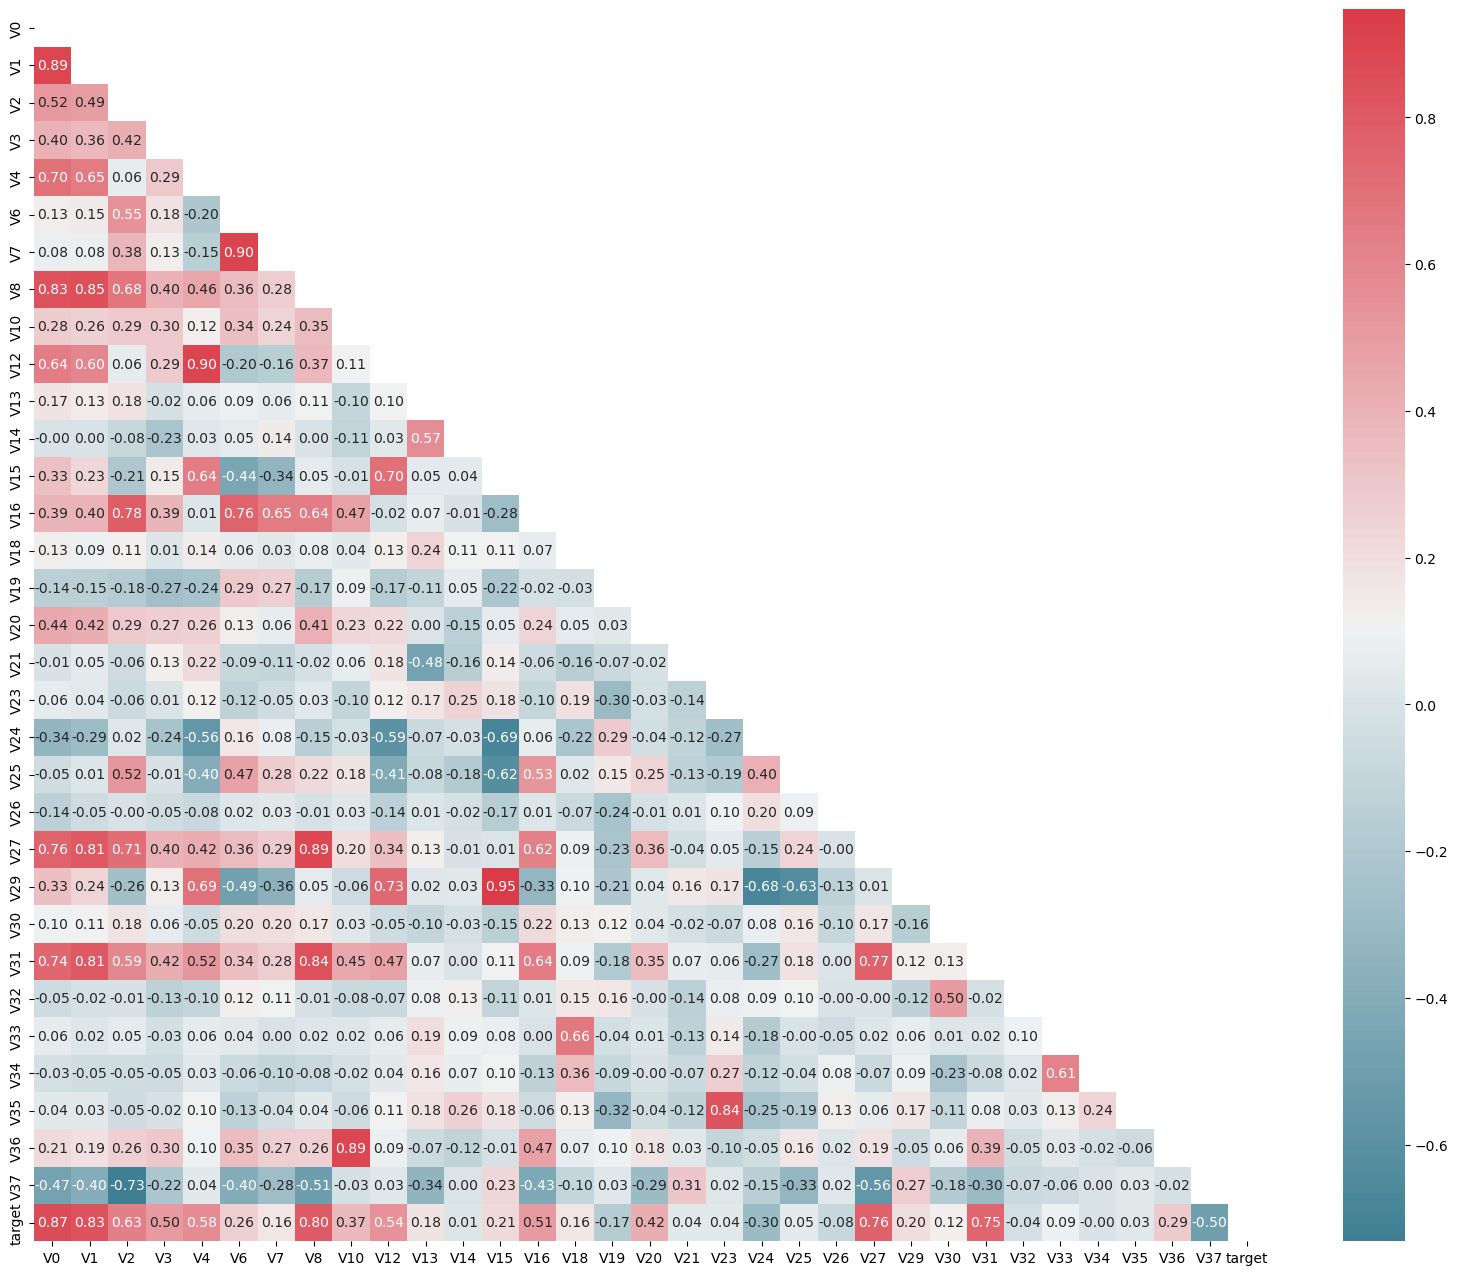

In [104]:
## ------------------------------------------------------------------------ ##
## --------04 绘制相关系数热力图 ------------------------------------------- ##
## ------------------------------------------------------------------------ ##
plt.figure(figsize=(20,16))
column = train_data_scaler_drop.columns.tolist()
mcorr  = train_data_scaler_drop[column].corr(method='spearman')
# print(f"mcorr=\n{mcorr}")
mask   = np.zeros_like(mcorr, dtype=np.bool) # 创建1个和mcorr一样大小的np数组，其中元素为布尔类型
mask[np.triu_indices_from(mask)] = True # np.triu_indices_from(mask) 返回 mask的upper-triangle，这里将mask的右上三角置True
cmap   = sns.diverging_palette(220, 10, as_cmap=True) # diverging_palette创建一个色盘
g      = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f') # mask传入后，其中True的部分就不显示
plt.show()

### 05 删除相关系数 小于0.1特征

target    1.000000
V0        0.866523
V1        0.832175
V8        0.799548
V27       0.764757
V31       0.749838
V2        0.629754
V4        0.576065
V12       0.543660
V16       0.510412
V3        0.502582
V37       0.496319
V20       0.419515
V10       0.372017
V24       0.297175
V36       0.288616
V6        0.264083
V15       0.214283
V29       0.199393
V13       0.177776
V19       0.171888
V7        0.164521
V18       0.161400
V30       0.122005
Name: target, dtype: float64


<Axes: title={'center': 'After deletion'}>

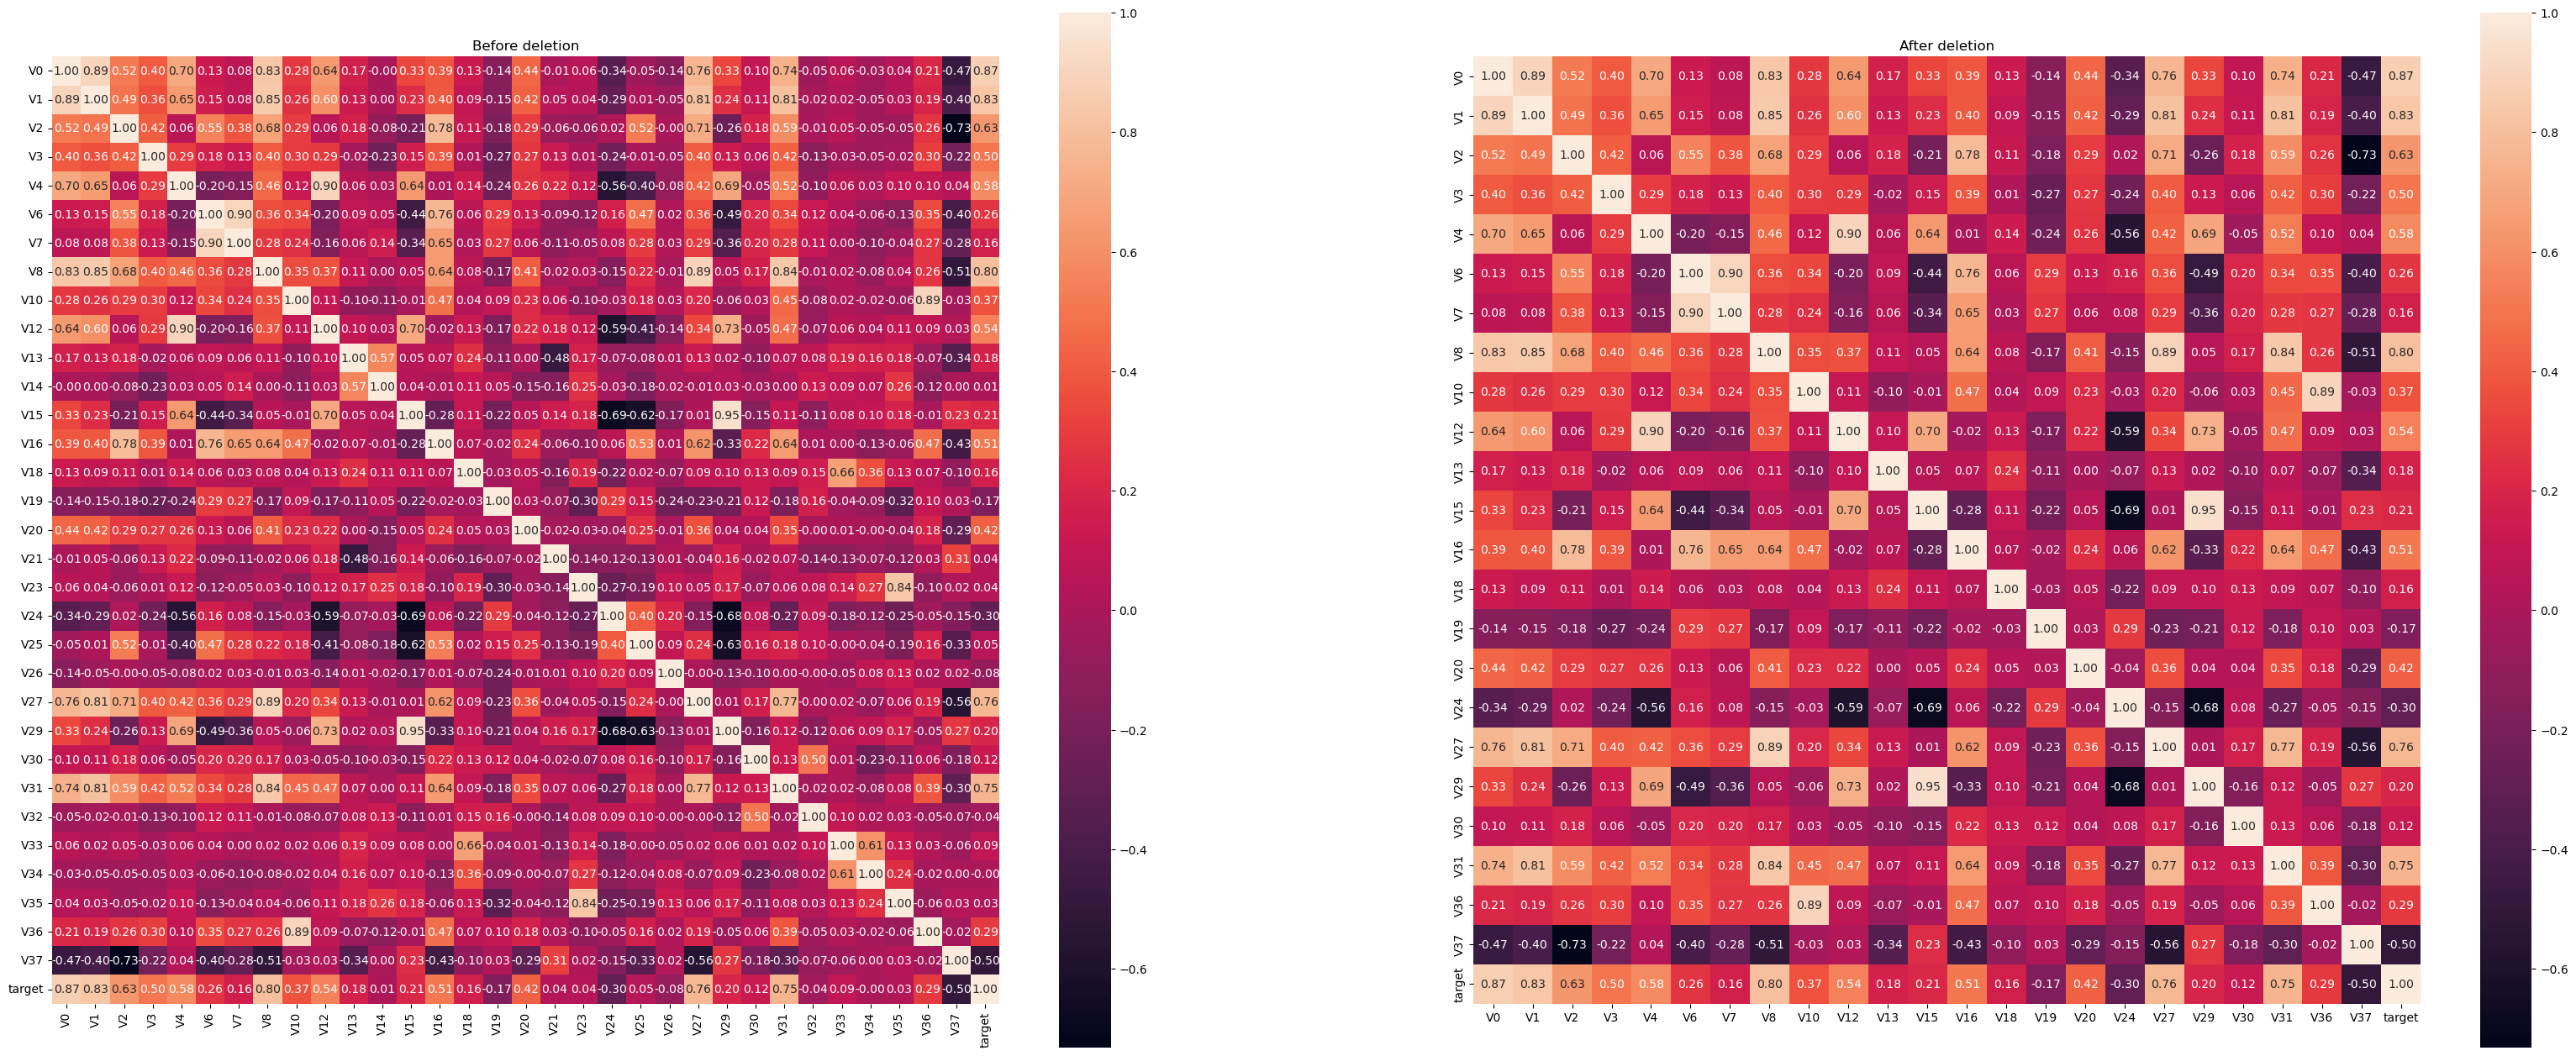

In [119]:
## ------------------------------------------------------------------------ ##
## --------05 筛选相关系数>0.1特征 ----------------------------------------- ##
## ------------------------------------------------------------------------ ##
corr_lowerLimit = 0.1
column = train_data_scaler_drop.columns.tolist()
mcorr  = train_data_scaler_drop[column].corr(method='spearman')
mcorr  = mcorr.abs()
numerical_corr = mcorr[mcorr['target']>corr_lowerLimit]['target']
print(numerical_corr.sort_values(ascending=False))

train_data_scaler_drop_drop = train_data_scaler_drop[numerical_corr.index]
test_data_scaler_drop_drop  = test_data_scaler_drop[numerical_corr.index]

plt.figure(figsize=(40,16))
plt.subplot(121)
plt.title("Before deletion")
sns.heatmap(train_data_scaler_drop.corr(method='spearman'),square=True, annot=True, fmt='0.2f')
plt.subplot(122)
plt.title("After deletion")
sns.heatmap(train_data_scaler_drop_drop.corr(method='spearman'),square=True, annot=True, fmt='0.2f')

### 06 PCA 去除多重共线性

若特征之间的相关系数较大，则可能存在较大的共线性影响，所以要去除多重共线性

#### VIF计算

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 多重共线性方差膨胀因子

# 多重共线性
new_numerical = ['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10', 'V11',
                 'V13', 'V15', 'V16', 'V18', 'V19', 'V20',
                 'V22', 'V24', 'V30', 'V31', 'V37']
X = np.matrix(train_data_scaler[new_numerical]) # 就是把dataframe转为np矩阵而已
# print(X)
# print(train_data_scaler[new_numerical])
VIF_list = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
display(np.vstack((new_numerical, VIF_list)))

df1 = pd.DataFrame({'variables':train_data_scaler.columns[0:], 'VIF':[variance_inflation_factor(train_data_scaler.values, i) for i in range(len(train_data_scaler.columns[0:]))]})
display(df1)

array([['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10', 'V11', 'V13', 'V15',
        'V16', 'V18', 'V19', 'V20', 'V22', 'V24', 'V30', 'V31', 'V37'],
       ['216.73387180903222', '114.38118723828812', '27.863778129686356',
        '201.96436579080174', '78.93722825798903', '151.06983667656212',
        '14.519604941508451', '82.69750284665385', '28.479378440614585',
        '27.759176471505945', '526.6483470743831', '23.50166642638334',
        '19.920315849901424', '24.64048176500875', '11.816055964845381',
        '4.958208708452915', '37.09877416736591', '298.26442986612767',
        '47.854002539887034']], dtype='<U32')

variables         VIF
0         V0  420.182533
1         V1  498.301268
2         V2  174.809366
3         V3   36.913226
4         V4  422.531734
5         V5  104.285558
6         V6  762.129169
7         V7  437.175026
8         V8  558.925485
9         V9  147.244085
10       V10  101.113145
11       V11   94.967874
12       V12  388.107729
13       V13   59.785238
14       V14   23.087946
15       V15  129.118103
16       V16  817.524781
17       V17   24.994438
18       V18   35.356696
19       V19   29.982065
20       V20   32.539054
21       V21   24.444728
22       V22   24.694771
23       V23  110.786479
24       V24    6.367550
25       V25   76.765117
26       V26   59.785980
27       V27  297.531655
28       V28   11.026592
29       V29  147.617871
30       V30   67.990357
31       V31  534.442503
32       V32   48.655663
33       V33   56.726053
34       V34   54.938898
35       V35   85.079761
36       V36   93.110267
37       V37   76.621326
38    target    6.549742

#### VIF理解
VIF is related to the R-squared, and its formula is,

VIF的本质。也就是将新变量带入模型后相关性矩阵行列式的增量

https://www.zhihu.com/question/270451437

$VIF_i=\frac{1}{(1−(R_i)^2)}=\frac{M_{ii}}{|P|}$

Where $R_i$ = multiple correlation coefficient between Xi and remaining independent variables (p-1)

P为pearson相关系数矩阵，M_ii为将P中i行i列划去后，剩余部分的行列式，即M_ii为p_ii的余子式

i = 1,..., p (independent variables)

When $(R_i)^2$ = 0, there is a complete absence of multicollinearity
but when $(R_i)^2$ = 1, there is exact multicollinearity

https://www.reneshbedre.com/blog/variance-inflation-factor.html

In [145]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
df = pd.read_csv("./bp.csv")
X = df[['Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']]   # independent variables
y = df['BP']   # dependent variables
X = sm.add_constant(X) # 在X中添加了1列'const',数值均为1.0
# fit the regression model
reg = sm.OLS(y, X).fit()
# get Variance Inflation Factor (VIF) 

'''
计算X中第2列Weight的VIF,即以Weight为因变量，其余为自变量进行拟合，得到R_i^2,代入公式计算VIF_i
'''
print(variance_inflation_factor(X.values,2)) 

df1 = pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})
display(df1)
'''
VIF的结果如下，可见Weight, BSA, Pulse的VIF>2,即认为他们和其他自变量之前存在显著的线性相关关系
但VIF不能告诉我们，到底Weight, BSA, Pulse和那些自变量之间有这么显著的线性相关关系

所以还要求P矩阵来看，看Weight, BSA, Pulse这3个变量分别和哪些变量的P值高
所以VIF实际上是相关系数矩阵前可以做的工作
'''
X = df[['Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']]
X.corr(method='pearson')

'''
As per pairwise correlation analysis, Weight is highly correlated with BSA (r > 0.8) and Pulse (r > 0.6). 
To remove the multicollinearity, drop the variables BSA and Pulse, and reanalyze the regression model.
'''
# X = df[['Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']]
X =   df[['Age', 'Weight',        'Dur',          'Stress']]

8.417035029633078


variables       VIF
0       Age  1.762807
1    Weight  8.417035
2       BSA  5.328751
3       Dur  1.237309
4     Pulse  4.413575
5    Stress  1.834845

Age    Weight       BSA       Dur     Pulse    Stress
Age     1.000000  0.407349  0.378455  0.343792  0.618764  0.368224
Weight  0.407349  1.000000  0.875305  0.200650  0.659340  0.034355
BSA     0.378455  0.875305  1.000000  0.130540  0.464819  0.018446
Dur     0.343792  0.200650  0.130540  1.000000  0.401514  0.311640
Pulse   0.618764  0.659340  0.464819  0.401514  1.000000  0.506310
Stress  0.368224  0.034355  0.018446  0.311640  0.506310  1.000000

#### PCA 90

In [153]:
from sklearn.decomposition import PCA

# 保持90%的信息                   或者 指定保留的特征数目
pca = PCA(n_components=0.9)          # pca = PCA(n_components=16)
# train_data_scaler.iloc[:,0:-1]就是没要'target'字段
new_train_pca_90 = pd.DataFrame(pca.fit_transform(train_data_scaler.iloc[:,0:-1]),
                                index=train_data_scaler.index)
new_test_pca_90  = pd.DataFrame(pca.fit_transform(test_data_scaler),
                                index=test_data_scaler.index)
new_train_pca_90['target'] = train_data_scaler['target']
display(new_train_pca_90.describe())
# display(train_data_scaler)
# display(train_data_scaler.iloc[:,0:-1])


0             1             2             3             4  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean  -2.954440e-17 -3.939253e-17  2.462033e-17 -5.416473e-17  7.878506e-17   
std    3.998976e-01  3.500240e-01  2.938631e-01  2.728023e-01  2.077128e-01   
min   -1.071795e+00 -9.429479e-01 -9.948314e-01 -7.103087e-01 -7.703987e-01   
25%   -2.804085e-01 -2.613727e-01 -2.090797e-01 -1.945196e-01 -1.315620e-01   
50%   -1.417104e-02 -1.277241e-02  2.112166e-02 -2.337401e-02 -5.122797e-03   
75%    2.287306e-01  2.317720e-01  2.069571e-01  1.657590e-01  1.281660e-01   
max    1.597730e+00  1.382802e+00  1.010250e+00  1.448007e+00  1.034061e+00   

                  5             6             7             8             9  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean  -3.323745e-17  3.939253e-17  4.431659e-17 -5.416473e-17  8.986421e-17   
std    1.951842e-01  1.877104e-01  1.607670e-01  1.512707e-01  1.443772e-01   
min   -5.340294e-01 -5.993766e-01 -5.870755e-01 -6.282818e-01 -4.902583e-01   
25%   -1.264097e-01 -1.236360e-01 -1.016452e-01 -9.662098e-02 -9.297088e-02   
50%   -1.355336e-02 -1.747870e-04 -4.656359e-03  2.572054e-03 -1.479172e-03   
75%    9.993122e-02  1.272081e-01  9.657222e-02  1.002626e-01  9.059634e-02   
max    1.358962e+00  6.191589e-01  7.370089e-01  6.449125e-01  5.839586e-01   

                 10            11            12            13            14  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean   1.969626e-17  1.243327e-16 -9.232624e-18 -5.908879e-17 -1.107915e-17   
std    1.368790e-01  1.286192e-01  1.193301e-01  1.149758e-01  1.133507e-01   
min   -6.341045e-01 -5.906753e-01 -4.175153e-01 -4.310613e-01 -4.170535e-01   
25%   -8.202809e-02 -7.721868e-02 -7.139961e-02 -7.474073e-02 -7.709743e-02   
50%    7.286444e-03 -5.745946e-03 -4.140670e-03  1.054915e-03 -1.758387e-03   
75%    8.833765e-02  7.148033e-02  6.786199e-02  7.574868e-02  7.116829e-02   
max    6.405187e-01  6.780732e-01  5.156118e-01  4.978126e-01  4.673189e-01   

                 15       target  
count  2.886000e+03  2886.000000  
mean   1.274102e-16     0.127451  
std    1.019259e-01     0.983144  
min   -3.601627e-01    -3.044000  
25%   -6.603914e-02    -0.347500  
50%   -7.533392e-04     0.314000  
75%    6.357449e-02     0.793750  
max    4.570870e-01     2.538000

#### PCA 16

In [46]:
from sklearn.decomposition import PCA

# 指定保留的特征数目
pca = PCA(n_components=16)
# train_data_scaler.iloc[:,0:-1]就是没要'target'字段
new_train_pca_16 = pd.DataFrame(pca.fit_transform(train_data_scaler.iloc[:,0:-1]),
                                index=train_data_scaler.index)
new_test_pca_16  = pd.DataFrame(pca.fit_transform(test_data_scaler),
                                index=test_data_scaler.index)
new_train_pca_16['target'] = train_data_scaler['target']
display(new_train_pca_16.describe())
# display(train_data_scaler)
# display(train_data_scaler.iloc[:,0:-1])

0             1             2             3             4  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean  -1.969626e-17 -4.924066e-17  1.231017e-17 -2.954440e-17  7.386099e-17   
std    3.998976e-01  3.500240e-01  2.938631e-01  2.728023e-01  2.077128e-01   
min   -1.071795e+00 -9.429479e-01 -9.948314e-01 -7.103086e-01 -7.704004e-01   
25%   -2.804085e-01 -2.613727e-01 -2.090798e-01 -1.945195e-01 -1.315619e-01   
50%   -1.417105e-02 -1.277241e-02  2.112162e-02 -2.337402e-02 -5.123195e-03   
75%    2.287306e-01  2.317720e-01  2.069571e-01  1.657590e-01  1.281658e-01   
max    1.597730e+00  1.382802e+00  1.010250e+00  1.448007e+00  1.034060e+00   

                  5             6             7             8             9  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean  -3.569948e-17  5.908879e-17  4.431659e-17 -4.431659e-17  8.986421e-17   
std    1.951842e-01  1.877104e-01  1.607670e-01  1.512707e-01  1.443772e-01   
min   -5.340275e-01 -5.993771e-01 -5.870763e-01 -6.282884e-01 -4.902255e-01   
25%   -1.264090e-01 -1.236350e-01 -1.016415e-01 -9.661888e-02 -9.297034e-02   
50%   -1.355444e-02 -1.759976e-04 -4.658336e-03  2.566647e-03 -1.477398e-03   
75%    9.993004e-02  1.272082e-01  9.657264e-02  1.002632e-01  9.059176e-02   
max    1.358962e+00  6.191555e-01  7.370132e-01  6.449304e-01  5.839569e-01   

                 10            11            12            13            14  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean   1.600321e-17  1.231017e-16 -1.969626e-17 -7.262997e-17 -1.477220e-17   
std    1.368790e-01  1.286192e-01  1.193301e-01  1.149758e-01  1.133506e-01   
min   -6.340842e-01 -5.908547e-01 -4.173990e-01 -4.310695e-01 -4.170840e-01   
25%   -8.203603e-02 -7.719025e-02 -7.138251e-02 -7.473938e-02 -7.694607e-02   
50%    7.287693e-03 -5.776322e-03 -4.157774e-03  1.058490e-03 -1.817087e-03   
75%    8.833921e-02  7.146351e-02  6.783835e-02  7.574147e-02  7.116833e-02   
max    6.405225e-01  6.781314e-01  5.155048e-01  4.978491e-01  4.671269e-01   

                 15       target  
count  2.886000e+03  2884.000000  
mean   1.298722e-16     0.127274  
std    1.019258e-01     0.983462  
min   -3.601414e-01    -3.044000  
25%   -6.606134e-02    -0.348500  
50%   -6.050993e-04     0.313000  
75%    6.360727e-02     0.794250  
max    4.571566e-01     2.538000

# 4 模型训练

1. 线性回归
2. KNN
3. DT
4. Ensemble

## 4.0 数据切分

In [7]:
from sklearn.model_selection import train_test_split
# new_train_pca_16 = new_train_pca_16.fillna(0)
train  = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据，训练集80%，验证集20%
train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)

## 4.1 线性回归

In [11]:
from sklearn.metrics import mean_squared_error # mse
from sklearn.linear_model import LinearRegression

clf = LinearRegression() #clf=classifier
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression: ", score)

LinearRegression:  0.12812506119269343


## 4.2 KNN

In [9]:
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, clf.predict(test_data))
print("KNN: ", score)

KNN:  0.2025806243752403


## 4.3 DT

In [10]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, clf.predict(test_data))
print("DT: ", score)

DT:  0.3206861020761245


## 4.4 Ensemble

### 4.4.1 Random forest

RF输出所有决策树的输出值的平均值

无须特征降维

In [12]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=200) # 200棵树
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RF: ", score)

RF:  0.1535113851600345


### 4.4.2 Light Gradient Boosting Machine-LightGBM

没有给例子，下面的代码是把后面的内容挪到这里

In [15]:
import lightgbm as lgb

clf = lgb.LGBMRegressor(
    learning_rate = 0.01,
    max_depth = -1,
    n_estimators = 5000,
    boosting_type = 'gbdt',
    random_state = 2019,
    objective = 'regression',
)

clf.fit(X=train_data, y=train_target, eval_metric='MSE', verbose=50)
score = mean_squared_error(test_target, clf.predict(test_data))
print("lightGBM: ", score)

lightGBM:  0.14029486290725343


### 4.4.3 其他常用

Elastic Net：在参数空间中对L1和L2范数进行正则化的线性回归模型
（岭回归与Lasso回归的结合）

SVR(Support Vector Regression): SV在线性回归模型中的应用

# 赛题-模型训练

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # mse

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

new_train_pca_16 = new_train_pca_16.fillna(0)
'''
如果在MinMax归一化那一步，没有进行index对齐，那这里就要fillna
下面的训练结果也会有很大不同

(1) 对齐index
    LR                   ||  KNN                  ||  RF                    ||  LGB
    0.1281656440189224       0.20172165186466745      0.15237283985276812       0.14388225481213587
(2) 不对齐index
    0.2717017847125424       0.26758239023452524      0.24973593480402245       0.24761992388152076
'''


train  = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据，训练集80%，验证集20%
train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)

In [48]:
clf = LinearRegression() #clf=classifier
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression: ", score)

LinearRegression:  0.2717017847125424


In [49]:
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("KNN: ", score)

KNN:  0.26758239023452524


In [50]:
clf = RandomForestRegressor(n_estimators=200) # 200棵树
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RF: ", score)

RF:  0.24973593480402245


In [51]:
clf = lgb.LGBMRegressor(
    learning_rate = 0.01,
    max_depth = -1,
    n_estimators = 5000,
    boosting_type = 'gbdt',
    random_state = 2019,
    objective = 'regression',
)

clf.fit(X=train_data, y=train_target, eval_metric='MSE', verbose=50)
score = mean_squared_error(test_target, clf.predict(test_data))
print("lightGBM: ", score)

lightGBM:  0.24761992388152076


# 5 模型验证

## 5.1 模型评估概念与方法

### 5.1.1 欠拟合 与 过拟合

1. 欠拟合： 高偏差 bias; 
   1. 解决方式：
      1. 增加额外特征；
      2. 增加多项式特征；
      3. 减小$\lambda$；
2. 过拟合： 高方差 variance;
   1. 解决方式：
      1. 增加数据量；
      2. 减少特征数；
      3. 增加$\lambda$；

### 5.1.2 泛化和正则化

泛化: 处理未遇到过的样本的能力

正则化: 防止过拟合

#### 1 岭回归=多线 + alpha L2

岭回归的回归曲线  始终是曲线，随alpha改变，会趋近一条几乎水平的直线

#### 2 LASSO=多线 + alpha L1

LASSO的结果会随alpha改变，更加倾向于一条直线

### 5.1.3 回归模型的评估指标

1. MAE: Mean Absolute Error, 平均绝对值误差=所有误差的绝对值取平均
2. MSE: Mean Square Error, 均方误差=所有误差的平方取平均
3. RMSE: Root-Mean-Square Error, 均方根误差=sqrt(MSE)
4. R-Squared: $R^2=1-\frac{\sum (y_i-y_{i,predict})^2}{\sum (y_i-avg(y))^2}$

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_squared_error #没有直接的包，就拿MSE做开方就好了
from sklearn.metrics import r2_score

### 5.1.4 交叉验证

1. 简单交叉验证
2. K折交叉验证
3. 留一法交叉验证
4. 留P法交叉验证
   

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(df.describe())

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [11]:
## 1 简单交叉验证
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
## 2 K折交叉验证
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
## 3 留一法交叉验证
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
## 4 留P法交叉验证
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=5)

## 5.2 模型调参

### 5.2.1 调参

1. 过程影响类参数：子模型不变，改变 子模型数，学习率
2. 子模型影响类参数

bagging: 降低方差（模型并联，样本独立）

boosting: 降低偏差（模型串联，样本更新）


### 5.2.2 网格搜索

Grid Search 是一种穷举搜索法

比如一个模型有2个参数：a和b，a有3种取值；b有4种取值；

则所有取值构成参数矩阵3x4，每种组合就是一个网格

网格搜索由此而来


In [2]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0)

print("Size of training set: {} size of testing set: {}".format(
    X_train.shape[0], X_test.shape[0]
))

best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score=score
            best_parameters = {'gamma':gamma, 'C':C}
print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Size of training set: 112 size of testing set: 38
Best score:0.97
Best parameters:{'gamma': 0.001, 'C': 100}


### 5.2.3 学习曲线

横轴：训练集大小

纵轴：训练集准确度  or 验证集准确度  or  期望准确度

### 5.2.4 验证曲线

横轴：某一超参数的一系列取值

纵轴：模型准确率

# 赛题-模型验证与调参

In [2]:
## -------------------------------------------------------
## --导包-------------------------------------------------
## -------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # mse

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import SGDRegressor

## -------------------------------------------------------
## --读取数据----------------------------------------------
## -------------------------------------------------------
train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"
train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data  = pd.read_csv(test_data_file,  sep='\t', encoding='utf-8')

## -------------------------------------------------------
## --数据归一化--------------------------------------------
## -------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
feature_columns = [col for col in train_data.columns if col not in ['target']]

# train_data_scaler的index一定要指定为train_data的index，因为前面train_data做了删行操作，index不连续
# 如果不修改train_data_scaler的index，则会出现错位，进而使得下面进行赋予操作时
# train_data['target']的index与train_data_scaler的index有错位，进而target字段有空值

# train_data_scaler = pd.DataFrame(MinMaxScaler().fit_transform(train_data[feature_columns]), columns=feature_columns, index=train_data.index)
# train_data_scaler['target'] = train_data['target']
# test_data_scaler  = pd.DataFrame(MinMaxScaler().fit_transform(test_data[feature_columns]),  columns=feature_columns, index=test_data.index)

train_data_scaler = pd.DataFrame(MinMaxScaler().fit_transform(train_data[feature_columns]), columns=feature_columns)
train_data_scaler['target'] = train_data['target']
test_data_scaler  = pd.DataFrame(MinMaxScaler().fit_transform(test_data[feature_columns]),  columns=feature_columns)

## -------------------------------------------------------
## --PCA--------------------------------------------------
## -------------------------------------------------------
from sklearn.decomposition import PCA
# 指定保留的特征数目
pca = PCA(n_components=16)
# train_data_scaler.iloc[:,0:-1]就是没要'target'字段
new_train_pca_16 = pd.DataFrame(pca.fit_transform(train_data_scaler.iloc[:,0:-1]),
                                index=train_data_scaler.index)
new_test_pca_16  = pd.DataFrame(pca.fit_transform(test_data_scaler),
                                index=test_data_scaler.index)
new_train_pca_16['target'] = train_data_scaler['target']
# display(new_train_pca_16.describe())

## -------------------------------------------------------
## --切分数据----------------------------------------------
## -------------------------------------------------------
# 切分数据，训练集80%，验证集20%
new_train_pca_16 = new_train_pca_16.fillna(0)
train  = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']
train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)



## 1 欠拟合

In [3]:
clf = SGDRegressor(max_iter=500, tol=1E-2)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test  = mean_squared_error(test_target,  clf.predict(test_data))
print("SGDRegressor train MSE:  ", score_train)
print("SGDRegressor test MSE:  ",  score_test)

SGDRegressor train MSE:   0.1518299709589741
SGDRegressor test MSE:   0.15627608513554492


## 2 过拟合

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)

train_value = []
test_value = []
# for penalty_type in [0, 0, 0, 0]:
for penalty_type in [0, 'L2', 'L1', 'elasticNet']:
    if penalty_type == 0:
        clf = SGDRegressor(max_iter=1000, tol=1e-3)
    elif penalty_type == 'L2':
        clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', alpha=0.0001)
    elif penalty_type == 'L1':
        clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l1', alpha=0.0001)
    elif penalty_type == 'elasticNet':
        clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='elasticnet', l1_ratio=0.9)
    else:
        print('no such type')
    clf.fit(train_data_poly, train_target)
    score_train = mean_squared_error(train_target,
                                    clf.predict(train_data_poly))
    score_test  = mean_squared_error(test_target,
                                    clf.predict(test_data_poly))
    print(f"{penalty_type} SGDRegressor train MSE:  ", score_train)
    print(f"{penalty_type} SGDRegressor test MSE:  ",  score_test)
    train_value.append(score_train)
    test_value.append(score_test)
score_all = pd.DataFrame(np.vstack((np.array(train_value),np.array(test_value))), columns=[0, 'L2', 'L1', 'elasticNet'], index=['train','test'])
display(score_all)

0 SGDRegressor train MSE:   0.13352179782803078
0 SGDRegressor test MSE:   0.145801917609145
L2 SGDRegressor train MSE:   0.13345077839751154
L2 SGDRegressor test MSE:   0.14601684997395953
L1 SGDRegressor train MSE:   0.13330783884665992
L1 SGDRegressor test MSE:   0.1451299513866718
elasticNet SGDRegressor train MSE:   0.13362930712216914
elasticNet SGDRegressor test MSE:   0.14523165756292863


0        L2        L1  elasticNet
train  0.133522  0.133451  0.133308    0.133629
test   0.145802  0.146017  0.145130    0.145232

## 3 正常拟合

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target,
                                 clf.predict(train_data_poly))
score_test  = mean_squared_error(test_target,
                                 clf.predict(test_data_poly))
print("SGDRegressor train MSE:  ", score_train)
print("SGDRegressor test MSE:  ",  score_test)

SGDRegressor train MSE:   0.134069378649544
SGDRegressor test MSE:   0.14255297315627324


train      test
under   0.151377  0.156004
over    0.133154  0.145624
proper  0.134069  0.142553

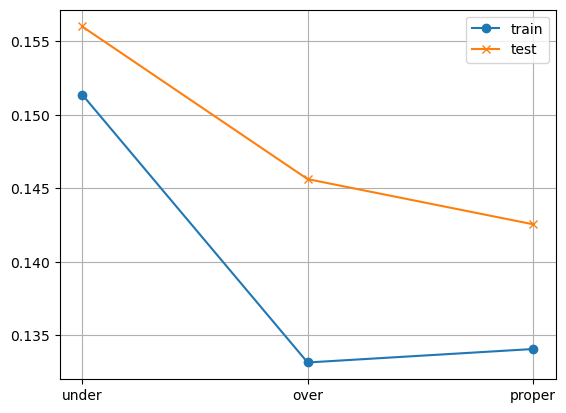

In [42]:
mse = np.array([[0.15137702367101835,0.1560039450974423],
                [0.13315388738116316, 0.14562387192454865],
                [0.134069378649544, 0.14255297315627324]])
df1 = pd.DataFrame(mse, columns=['train','test'],index=['under','over','proper'])
display(df1)
plt.plot(df1['train'],'-o',label='train')
plt.plot(df1['test'],'-x',label='test')
plt.legend()
plt.grid()


## c-1 K折交叉

In [7]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data   = train.values[train_index]
    test_data    = train.values[test_index]
    train_target = target[train_index]
    test_target  = target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test  = mean_squared_error(test_target,  clf.predict(test_data))
    print(f"{k} fold SGDRegressor train MSE: {score_train}")
    print(f"{k} fold SGDRegressor test MSE: {score_test} \n")


0 fold SGDRegressor train MSE: 0.1507487112458704
0 fold SGDRegressor test MSE: 0.10586723829800243 

1 fold SGDRegressor train MSE: 0.1335912480027648
1 fold SGDRegressor test MSE: 0.18244583426780653 

2 fold SGDRegressor train MSE: 0.14647528845679356
2 fold SGDRegressor test MSE: 0.13273742110414816 

3 fold SGDRegressor train MSE: 0.1414314227367769
3 fold SGDRegressor test MSE: 0.16389530934037966 

4 fold SGDRegressor train MSE: 0.13874081992930132
4 fold SGDRegressor test MSE: 0.1660799598093826 



## c-2 留一法交叉

In [8]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data   = train.values[train_index]
    test_data    = train.values[test_index]
    train_target = target[train_index]
    test_target  = target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test  = mean_squared_error(test_target,  clf.predict(test_data))
    print(f"{k} th SGDRegressor train MSE: {score_train}")
    print(f"{k} th SGDRegressor test MSE: {score_test} \n")
    if k >= 5: break

0 th SGDRegressor train MSE: 0.14151358084851948
0 th SGDRegressor test MSE: 0.01196077690297731 

1 th SGDRegressor train MSE: 0.1416282659111756
1 th SGDRegressor test MSE: 0.12163186737354113 

2 th SGDRegressor train MSE: 0.14159197012304386
2 th SGDRegressor test MSE: 0.04035024993684579 

3 th SGDRegressor train MSE: 0.14158768095127844
3 th SGDRegressor test MSE: 0.0037784701868606753 

4 th SGDRegressor train MSE: 0.1416541376409973
4 th SGDRegressor test MSE: 0.012068054543679329 

5 th SGDRegressor train MSE: 0.14167428182503541
5 th SGDRegressor test MSE: 0.13951084771085162 



## c-3 留P法交叉

In [10]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data   = train.values[train_index]
    test_data    = train.values[test_index]
    train_target = target[train_index]
    test_target  = target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test  = mean_squared_error(test_target,  clf.predict(test_data))
    print(f"{k} th SGDRegressor train MSE: {score_train}")
    print(f"{k} th SGDRegressor test MSE: {score_test} \n")
    if k >= 5: break

0 th SGDRegressor train MSE: 0.1419308186489276
0 th SGDRegressor test MSE: 0.04891476433010643 

1 th SGDRegressor train MSE: 0.14134123858156986
1 th SGDRegressor test MSE: 0.04407475685868924 

2 th SGDRegressor train MSE: 0.14204617289599408
2 th SGDRegressor test MSE: 0.045947772951910985 

3 th SGDRegressor train MSE: 0.14135737588832425
3 th SGDRegressor test MSE: 0.05313730831859413 

4 th SGDRegressor train MSE: 0.1420578355204408
4 th SGDRegressor test MSE: 0.0695745517827803 

5 th SGDRegressor train MSE: 0.14132421576255152
5 th SGDRegressor test MSE: 0.044225758475503404 



## d-1 穷举网格搜索

https://www.cnblogs.com/wj-1314/p/10422159.html

In [19]:
from sklearn.model_selection import GridSearchCV #GridSearch和CV，即网格搜索和交叉验证
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)
rf1 = RandomForestRegressor()
parameters = {'n_estimators': [50, 100, 200], 'max_depth': [1,2,3]}
clf = GridSearchCV(rf1, parameters, cv=3) # cv=5, 即5折交叉
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))

print("Best score: %.2f"%clf.best_score_) 
print("Best parameter set: ", clf.best_estimator_)

print("RF GridSearchCV test CME: ", score_test)
sorted(clf.cv_results_.keys())


Best score: 0.74
Best parameter set:  RandomForestRegressor(max_depth=3, n_estimators=50)
RF GridSearchCV test CME:  0.25862654023953685


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## d-2 随机参数优化

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)
rf1 = RandomForestRegressor()
parameters = {'n_estimators': [50, 100, 200], 'max_depth': [1,2,3]}
clf = RandomizedSearchCV(rf1, parameters, cv=3) # cv=5, 即5折交叉
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))

print("Best score: %.2f"%clf.best_score_) 
print("Best parameter set: ", clf.best_estimator_)

print("RF RandomizedSearchCV test CME: ", score_test)
sorted(clf.cv_results_.keys())

Best score: 0.74
Best parameter set:  RandomForestRegressor(max_depth=3, n_estimators=200)
RF RandomizedSearchCV test CME:  0.25861817753125244


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [8]:
#_*_coding:utf-8_*_
# 输出文件开头注释的内容  __doc__的作用
'''
Python有个特性叫做文档字符串，即DocString ，这个特性可以让你的程序文档更加清晰易懂
'''
print(__doc__)
#1.使用单线程对文本分类的朴素贝叶斯模型的超参数组合执行网格搜索
 
from sklearn.datasets import fetch_20newsgroups
import numpy as np
news = fetch_20newsgroups(subset='all')
from sklearn.model_selection import train_test_split # 切分数据
#取前3000条新闻文本进行数据分割
X_train,X_test,y_train,y_test=train_test_split(news.data[:3000],
                                            news.target[:3000],test_size=0.25,random_state=33)
 
 
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
#*************导入pipeline*************
from sklearn.pipeline import Pipeline
#使用Pipeline简化系统搭建流程，sklean提供的pipeline来将多个学习器组成流水线，通常流水线的形式为：
#将数据标准化的学习器---特征提取的学习器---执行预测的学习器
#将文本特征与分类器模型串联起来,[(),()]里有两个参数
#参数1:执行 vect = TfidfVectorizer(stop_words='english',analyzer='word')操作
#参数2:执行 svc = SVC()操作
clf = Pipeline([('vect',TfidfVectorizer(stop_words='english',analyzer='word')),('svc',SVC())])
 
#这里需要试验的2个超参数svc_gamma和svc_C的元素个数分别为4、3,这样我们一共有12种超参数对集合
#numpy.linspace用于创建等差数列，numpy.logspace用于创建等比数列
#logspace中，开始点和结束点是10的幂
#例如logspace(-2,1,4)表示起始数字为10^-2，结尾数字为10^1即10，元素个数为4的等比数列
#parameters变量里面的key都有一个前缀,这个前缀其实就是在Pipeline中定义的操作名。二者相结合，使我们的代码变得十分简洁。
#还有注意的是，这里对参数名是<两条>下划线 __
parameters = {'svc__gamma':np.logspace(-2,1,4),'svc__C':np.logspace(-1,1,3)}
 
#从sklearn.grid_search中导入网格搜索模块GridSearchCV
from sklearn.model_selection import GridSearchCV 
#GridSearchCV参数解释:
#1.estimator : estimator(评估) object.
#2.param_grid : dict or list of dictionaries
#3.verbose:Controls the verbosity(冗余度): the higher, the more messages.
#4.refit:default=True, Refit(再次拟合)the best estimator with the entire dataset
#5.cv : int, cross-validation generator 此处表示3折交叉验证
gs = GridSearchCV(clf,parameters,verbose=2,refit=True,cv=3,n_jobs=-1) # n_jobs=-1, 调用全部cpu，运行时间从3min30s降低至1min
 
#执行单线程网格搜索
gs.fit(X_train,y_train)
 
print( gs.best_params_,gs.best_score_)
 
#最后输出最佳模型在测试集上的准确性
print( 'the accuracy of best model in test set is',gs.score(X_test,y_test))
 
#小结：
#1.由输出结果可知，使用单线程的网格搜索技术 对朴素贝叶斯模型在文本分类任务中的超参数组合进行调优，
#  共有12组超参数组合*3折交叉验证 =36项独立运行的计算任务
#2.在本机上，该过程一共运行了2.9min，寻找到最佳的超参数组合在测试集上达到的分类准确性为82.27%


Python有个特性叫做文档字符串，即DocString ，这个特性可以让你的程序文档更加清晰易懂

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'svc__C': 10.0, 'svc__gamma': 0.1} 0.7888888888888889
the accuracy of best model in test set is 0.8226666666666667


## e-1 学习曲线

### e-1-1 学习曲线--绘图机理版本

train size = SampleSIZE * np.linespace(0.1,1.0,5)=[ 288.8  938.6 1588.4 2238.2 2888. ]


<module 'matplotlib.pyplot' from 'c:\\Users\\Lip\\.conda\\envs\\py39\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1500x1200 with 0 Axes>

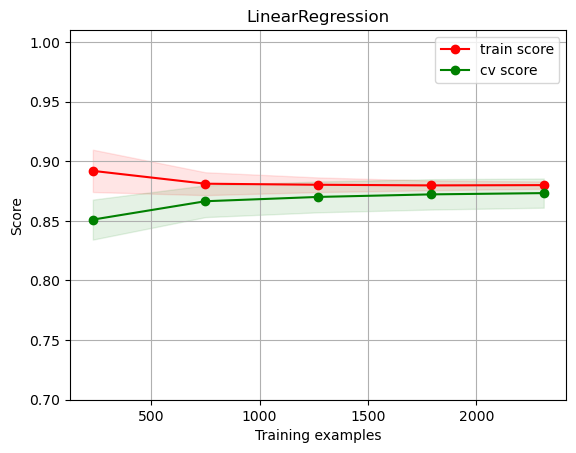

In [20]:
train_data2 = pd.read_csv('./zhengqi_train.txt', sep='\t')
test_data2  = pd.read_csv('./zhengqi_test.txt', sep='\t')
print(f"train size = SampleSIZE * np.linespace(0.1,1.0,5)={len(train_data2['V0'])*np.linspace(0.1, 1.0, 5)}")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve

plt.figure(figsize=(10,8), dpi=150)

def plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=-1,
                        train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    # print("train_sizes",train_sizes)
    # print("train_scores",train_scores)
    train_scores_mean = np.mean(train_scores, axis=1) # 沿train_scores的行求均值 [s1,s2,s3,...,s99,s100]
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color='r')
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="train score")
    plt.plot(train_sizes, test_scores_mean,  'o-', color='g', label="cv score")
    plt.legend(loc='best')
    return plt

X = train_data2[test_data2.columns].values
y = train_data2['target'].values

title='LinearRegression'

'''
cv用于传入learning_curve, 即交叉验证的方式
这里n_splits=100，所以，在每种样本容量下（比如0.2*实际总样本），
test_size=0.2, 训练集被分成80份测试，20份检验，这样的拆分会随机进行100次
这100次中每1次都可以计算一个score，所以本例中train_score的尺寸是5x100,5是5个样本尺寸，100即随机按80%20%拆分了100次
'''
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)


### e-1-2 学习曲线--LearningCurveDisplay

Text(0.5, 1.0, 'Learning Curve for SGDRegressor')

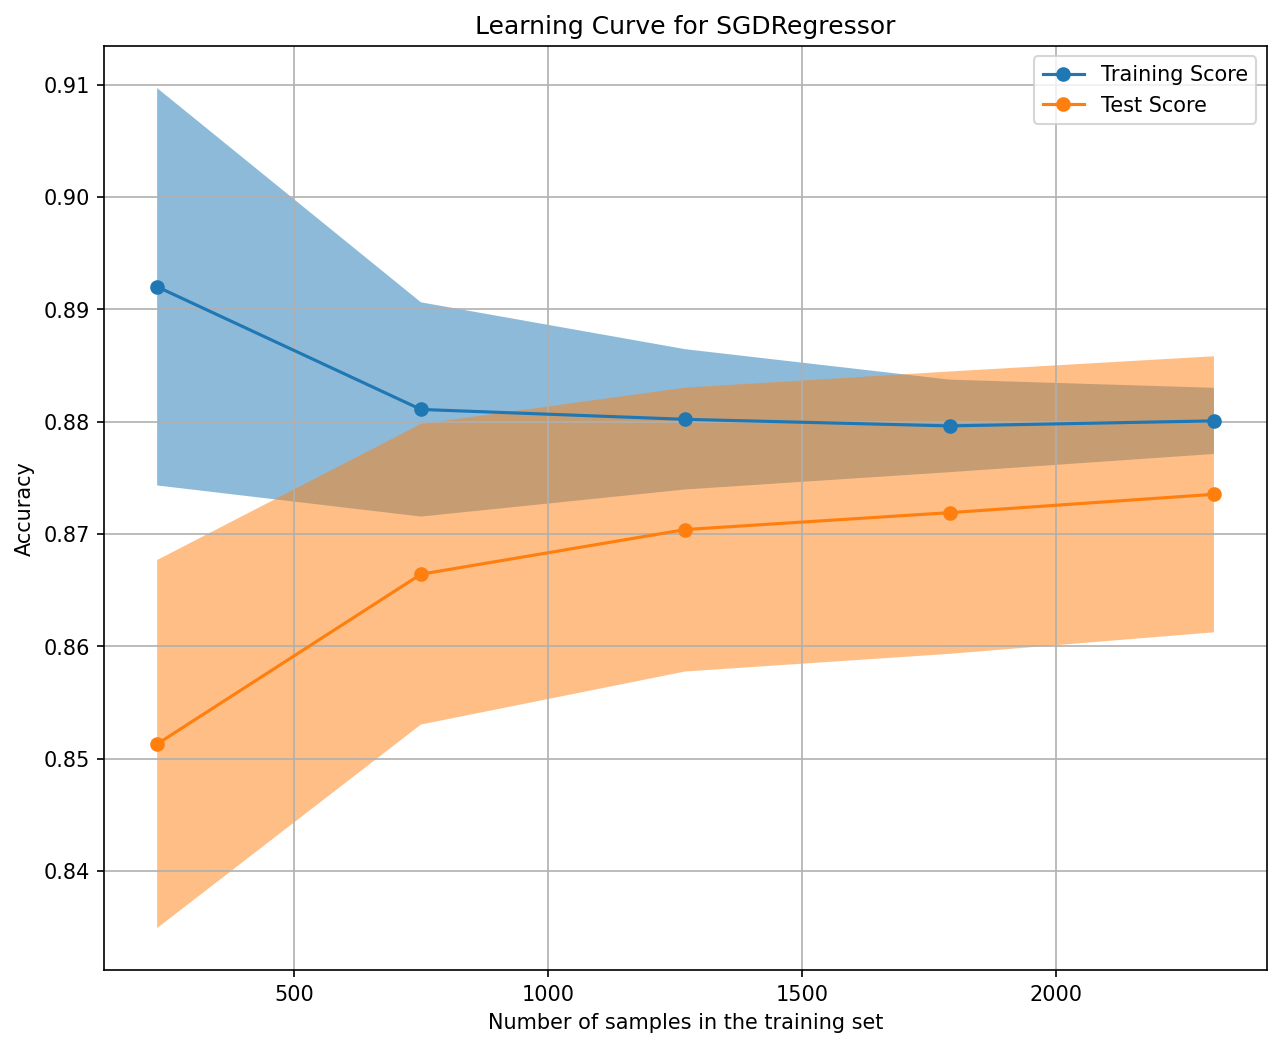

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import LearningCurveDisplay

train_data2 = pd.read_csv('./zhengqi_train.txt', sep='\t')
test_data2  = pd.read_csv('./zhengqi_test.txt', sep='\t')
X = train_data2[test_data2.columns].values
y = train_data2['target'].values

sgdr1 = SGDRegressor()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8),dpi=150)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=100, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

LearningCurveDisplay.from_estimator(estimator=sgdr1, **common_params, ax=ax)
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.grid()
ax.set_title(f"Learning Curve for {estimator.__class__.__name__}")

## e-2 验证曲线

validation_curve没有Display

[0.83915228 0.8720338  0.87936413 0.88000248 0.87997254 0.8803946 ]


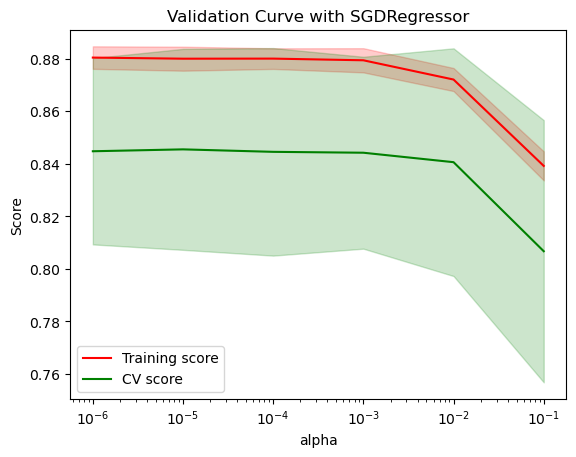

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

train_data2 = pd.read_csv('./zhengqi_train.txt', sep='\t')
test_data2  = pd.read_csv('./zhengqi_test.txt', sep='\t')
X = train_data2[test_data2.columns].values
y = train_data2['target'].values

param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_scores, test_scores = validation_curve(SGDRegressor(max_iter=1000,
                                                          tol=1e-3,
                                                          penalty='l1'),
                                            X,
                                            y,
                                            param_name="alpha",
                                            param_range=param_range,
                                            cv=10,
                                            scoring='r2',
                                            n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)


print(train_scores_mean)
plt.title("Validation Curve with SGDRegressor")
plt.xlabel("alpha")
plt.ylabel("Score")
# plt.ylim(0.0,1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color='r')
plt.fill_between(param_range,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.2,
                 color='r')
plt.semilogx(param_range, test_scores_mean, label="CV score", color='g')
plt.fill_between(param_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2,
                 color='g')
plt.legend(loc='best')
plt.show()

# 6 特征优化

1. 合成特征
   1. X1与X1自乘，或X1与X2相乘
   2. X1/X2
   3. 对连续特征分桶（分箱）X1=[0~10,step=1], 分箱[0~5]=1,[6~10]=0,则X1=[0,0,0,0,0,1,1,1,1,1]
2. 对特征做简单变换
   1. 无效的特征变换包括：加减常数，乘以常数，【决策树类算法，对单独特征的变换（X,X^3,ln(X))没有反应】
   2. 多项式变换
   3. X1/X2
   4. |X1|
   5. max/min(X1,X2), X1 or X2
   6. 类别特征C1,C2与数值特征N1,N2组合
      1. median/mean/mode/max/min/std/var(N1)_by(C1)
      2. freq(C2)_C1
3. 用决策树创建新特征
4. 特征组合
   1. f=w1x1+w2x2+w3x3, x3=x1x2, 依旧用线性模型，但引入非线性项
   2. one-hot enconding 组合
   3. 分箱，再one-hot

In [35]:
import pandas as pd

# input data
df = pd.DataFrame({
    "pid"  : [1, 1, 2, 3],
    "code" : ["a", "b", "b", "c"],
    "time" : [0, 0, 1, 0]
})

# two of the columns are categories
df["code"] = df.code.astype("category")
df["time"] = df.time.astype("category")

idx = pd.MultiIndex.from_product((df['code'].unique()
          ,df['time'].astype(str).unique())).map('_'.join)

print(df['code'].unique(),'\n----')
print(df['time'].astype(str).unique(),'\n----')
print(pd.MultiIndex.from_product((df['code'].unique()
          ,df['time'].astype(str).unique())),'\n----')
print(pd.MultiIndex.from_product((df['code'].unique()
          ,df['time'].astype(str).unique())).map('_'.join),'\n----')

out = (df['code'].str.cat(df['time'].astype(str),'_').str.get_dummies()
       .reindex(idx,axis=1,fill_value=0).groupby(df['pid']).max().reset_index())
print(df['code'].str.cat(df['time'].astype(str),'_'),'\n----')
print(df['code'].str.cat(df['time'].astype(str),'_').str.get_dummies(),'\n----')
print(df['code'].str.cat(df['time'].astype(str),'_').str.get_dummies().reindex(idx,axis=1,fill_value=0),'\n----')
print(df['code'].str.cat(df['time'].astype(str),'_').str.get_dummies().reindex(idx,axis=1,fill_value=0).groupby(df['pid']).max().reset_index(),'\n----')
# display(out)


['a', 'b', 'c']
Categories (3, object): ['a', 'b', 'c'] 
----
['0' '1'] 
----
MultiIndex([('a', '0'),
            ('a', '1'),
            ('b', '0'),
            ('b', '1'),
            ('c', '0'),
            ('c', '1')],
           ) 
----
Index(['a_0', 'a_1', 'b_0', 'b_1', 'c_0', 'c_1'], dtype='object') 
----
0    a_0
1    b_0
2    b_1
3    c_0
Name: code, dtype: object 
----
   a_0  b_0  b_1  c_0
0    1    0    0    0
1    0    1    0    0
2    0    0    1    0
3    0    0    0    1 
----
   a_0  a_1  b_0  b_1  c_0  c_1
0    1    0    0    0    0    0
1    0    0    1    0    0    0
2    0    0    0    1    0    0
3    0    0    0    0    1    0 
----
   pid  a_0  a_1  b_0  b_1  c_0  c_1
0    1    1    0    1    0    0    0
1    2    0    0    0    1    0    0
2    3    0    0    0    0    1    0 
----


# 赛题-特征优化

In [42]:
## -------------------------------------------------------
## --导包-------------------------------------------------
## -------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # mse

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import SGDRegressor

不做特征优化

In [44]:
## -------------------------------------------------------
## --读取数据----------------------------------------------
## -------------------------------------------------------
train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"
train_data2 = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data2  = pd.read_csv(test_data_file,  sep='\t', encoding='utf-8')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target  = train_data2['target'].values

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import numpy as np


Folds = 5
kf = KFold(n_splits=Folds, shuffle=True, random_state=2019)
MSE_DICT = {'train_mse':[], 'test_mse':[]}

for k, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
    X_train_KFold   = train_data2_f[train_index]
    X_test_KFold    = train_data2_f[test_index]
    y_train_KFold = train_data2_target[train_index]
    y_test_KFold  = train_data2_target[test_index]
    # LGB树模型
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression',
    )
    lgb_reg.fit(X=X_train_KFold,
                y=y_train_KFold,
                eval_set=[(X_train_KFold, y_train_KFold),
                          (X_test_KFold, y_test_KFold)],
                eval_names = ['Train', 'Test'],
                early_stopping_rounds=100,
                eval_metric='MSE',
                verbose=50)
    # 训练集与测试集
    y_train_KFold_predict = lgb_reg.predict(
        X_train_KFold, num_iteration = lgb_reg.best_iteration_
    )
    y_test_KFold_predict = lgb_reg.predict(
        X_test_KFold, num_iteration = lgb_reg.best_iteration_
    )
    print("第{}折 训练和预测 训练MSE 预测MSE".format(k))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    print('------\n','训练MSE\n',train_mse,'\n--------')
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print('------\n','预测MSE\n',test_mse,'\n--------')

    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('------\n','训练MSE\n',MSE_DICT['train_mse'],'\n', np.mean(MSE_DICT['train_mse']),'\n--------')
print('------\n','预测MSE\n',MSE_DICT['test_mse'],'\n', np.mean(MSE_DICT['test_mse']),'\n--------')

[50]	Train's l2: 0.428458	Test's l2: 0.466965
[100]	Train's l2: 0.221807	Test's l2: 0.263431
[150]	Train's l2: 0.135301	Test's l2: 0.183515
[200]	Train's l2: 0.0958737	Test's l2: 0.148825
[250]	Train's l2: 0.075642	Test's l2: 0.133187
[300]	Train's l2: 0.0629311	Test's l2: 0.125237
[350]	Train's l2: 0.054088	Test's l2: 0.121321
[400]	Train's l2: 0.0473551	Test's l2: 0.118307
[450]	Train's l2: 0.0418952	Test's l2: 0.116414
[500]	Train's l2: 0.0375119	Test's l2: 0.114863
[550]	Train's l2: 0.0337062	Test's l2: 0.114002
[600]	Train's l2: 0.0303868	Test's l2: 0.112781
[650]	Train's l2: 0.02756	Test's l2: 0.11207
[700]	Train's l2: 0.0250506	Test's l2: 0.111287
[750]	Train's l2: 0.0228758	Test's l2: 0.110742
[800]	Train's l2: 0.0209081	Test's l2: 0.1103
[850]	Train's l2: 0.0191684	Test's l2: 0.109946
[900]	Train's l2: 0.0176066	Test's l2: 0.109759
[950]	Train's l2: 0.0162243	Test's l2: 0.109423
[1000]	Train's l2: 0.014984	Test's l2: 0.109105
[1050]	Train's l2: 0.0138415	Test's l2: 0.108795
[1

做特征优化

In [ ]:

## -------------------------------------------------------
## --读取数据----------------------------------------------
## -------------------------------------------------------
train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"
train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data  = pd.read_csv(test_data_file,  sep='\t', encoding='utf-8')

'''原本后面是：归一化，PCA，切分数据，训练模型'''
## -------------------------------------------------------
## --定义特征构造方法---------------------------------------
## -------------------------------------------------------
epsilon = 1e-5
func_dict = {
    'add': lambda x,y: x+y,
    'mins': lambda x,y: x-y,
    'div': lambda x,y: x/(y+epsilon),
    'multi': lambda x,y: x*y
}

## -------------------------------------------------------
## --特征构造函数------------------------------------------
## -------------------------------------------------------
def auto_features_make(train_data, test_data, func_dict, col_list):
    train_data, test_data = train_data.copy(), test_data.copy()
    for col_i in col_list:
        for col_j in col_list:
            for func_name, func in func_dict.items():
                for data in [train_data, test_data]:
                    func_features = func(data[col_i], data[col_j])
                    col_func_features = '-'.join([col_i, func_name, col_j])
                    data[col_func_features] = func_features
    return train_data, test_data

## -------------------------------------------------------
## --PCA--------------------------------------------------
## -------------------------------------------------------
train_data2,test_data2 = auto_features_make(
    train_data, test_data, func_dict, col_list=test_data.columns
)
# display(train_data2) # 5815列：38特征*38特征*4个变换函数+38个原始特征+1个target字段
from sklearn.decomposition import PCA
# 指定保留的特征数目
pca = PCA(n_components=500)
# train_data_scaler.iloc[:,0:-1]就是没要'target'字段
train_data2_pca = pd.DataFrame(pca.fit_transform(train_data2.iloc[:,0:-1]))
test_data2_pca  = pd.DataFrame(pca.fit_transform(test_data2))
train_data2_pca['target'] = train_data2['target']

X_train2 = train_data2[test_data2.columns].values
y_train  = train_data2['target']

In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import numpy as np

Folds = 5
kf = KFold(n_splits=Folds, shuffle=True, random_state=2019)
MSE_DICT = {'train_mse':[], 'test_mse':[]}

for k, (train_index, test_index) in enumerate(kf.split(X_train2)):
    X_train_KFold   = X_train2[train_index]
    X_test_KFold    = X_train2[test_index]
    y_train_KFold = y_train[train_index]
    y_test_KFold  = y_train[test_index]
    # LGB树模型
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=500,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression',
    )
    lgb_reg.fit(X=X_train_KFold,
                y=y_train_KFold,
                eval_set=[(X_train_KFold, y_train_KFold),
                          (X_test_KFold, y_test_KFold)],
                eval_names = ['Train', 'Test'],
                early_stopping_rounds=100,
                eval_metric='MSE',
                verbose=50)
    # 训练集与测试集
    y_train_KFold_predict = lgb_reg.predict(
        X_train_KFold, num_iteration = lgb_reg.best_iteration_
    )
    y_test_KFold_predict = lgb_reg.predict(
        X_test_KFold, num_iteration = lgb_reg.best_iteration_
    )
    print("第{}折 训练和预测 训练MSE 预测MSE".format(k))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    print('------\n','训练MSE\n',train_mse,'\n--------')
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print('------\n','预测MSE\n',test_mse,'\n--------')

    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('------\n','训练MSE\n',MSE_DICT['train_mse'],'\n', np.mean(MSE_DICT['train_mse']),'\n--------')
print('------\n','预测MSE\n',MSE_DICT['test_mse'],'\n', np.mean(MSE_DICT['test_mse']),'\n--------')

[50]	Train's l2: 0.413149	Test's l2: 0.454926
[100]	Train's l2: 0.198054	Test's l2: 0.246445
[150]	Train's l2: 0.108942	Test's l2: 0.16496
[200]	Train's l2: 0.068339	Test's l2: 0.132002
[250]	Train's l2: 0.0478166	Test's l2: 0.117826
[300]	Train's l2: 0.0357877	Test's l2: 0.111144
[350]	Train's l2: 0.0279208	Test's l2: 0.10731
[400]	Train's l2: 0.0224493	Test's l2: 0.105219
[450]	Train's l2: 0.018293	Test's l2: 0.103438
[500]	Train's l2: 0.0150641	Test's l2: 0.102189
第0折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.015064121122151808 
--------
------
 预测MSE
 0.10218899850157814 
--------
[50]	Train's l2: 0.420939	Test's l2: 0.42324
[100]	Train's l2: 0.198813	Test's l2: 0.250634
[150]	Train's l2: 0.107207	Test's l2: 0.181511
[200]	Train's l2: 0.0661544	Test's l2: 0.152931
[250]	Train's l2: 0.0455508	Test's l2: 0.139933
[300]	Train's l2: 0.033771	Test's l2: 0.133815
[350]	Train's l2: 0.0262161	Test's l2: 0.130762
[400]	Train's l2: 0.0208654	Test's l2: 0.128809
[450]	Train's l2: 0.016869	Test's l2:

# 7 模型融合

1. Bagging+随机森林：弱学习器并行化
   1. Bagging将训练集分成多份的方式：Bootstrap sampling
      1. 比如抽样10次形成一个 子训练集，则对原始训练集的各行进行随机选择（下面例子的的一个数，就相当于实际训练集的一行）
      2. 这种方法，本质上是因为样本量不够，所以才这么干
   2. 随机森林  对  Bagging做改进 （或者说RF是Bagging的子集）
      1. 弱学习器  只能是  DT
      2. feature randomness
   
2. Boosting：弱学习器串行化
   1. AdaBoost
   2. Boosting Tree
   3. Gradient Boosting Tree

融合的策略：
1. Voting: 硬投(各弱学习器权重相等，取mode)；软投(各弱学习器权重不同，取mode)
2. Averaging 和 Ranking
   1. Ranking就是排名平均
3. Blending
4. Stacking (Stacking 和 Blending效果差不多)
   1. 分层集成模型：第1层的输入为原始训练集；第2层的输入为第1层的输出

Bootstrap sampling

In [1]:
import numpy as np

# Create a sample dataset
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Define the number of bootstrap samples to take
n_bootstrap = 10

# Define an empty list to store the bootstrap sample means
bootstrap_means = []

# Perform bootstrap sampling and calculate the mean for each sample
for i in range(n_bootstrap):
    # Generate a random sample with replacement from the original data
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    display(bootstrap_sample)
    # Calculate the mean of the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)
    # Append the bootstrap sample mean to the list
    bootstrap_means.append(bootstrap_mean)

# Calculate the mean and standard deviation of the bootstrap sample means
mean_of_bootstrap_means = np.mean(bootstrap_means)
std_of_bootstrap_means = np.std(bootstrap_means)

# Print the results
print("Mean of bootstrap sample means: {:.2f}".format(mean_of_bootstrap_means))
print("Standard deviation of bootstrap sample means: {:.2f}".format(std_of_bootstrap_means))


array([2, 1, 1, 5, 3, 3, 5, 9, 7, 9])

array([9, 7, 4, 4, 9, 2, 4, 7, 6, 1])

array([1, 2, 2, 7, 1, 1, 9, 5, 1, 9])

array([10,  2,  7,  9,  1,  5,  1,  1,  4,  2])

array([3, 4, 4, 3, 6, 3, 1, 2, 5, 4])

array([1, 8, 5, 4, 2, 2, 5, 9, 6, 1])

array([ 9,  7,  5,  3,  2, 10,  4,  2,  2,  5])

array([7, 5, 5, 8, 5, 3, 3, 9, 5, 7])

array([1, 7, 2, 4, 4, 4, 8, 5, 2, 2])

array([ 6,  9, 10,  3,  7,  7,  3,  9,  7,  6])

Mean of bootstrap sample means: 4.68
Standard deviation of bootstrap sample means: 0.93


软投示例

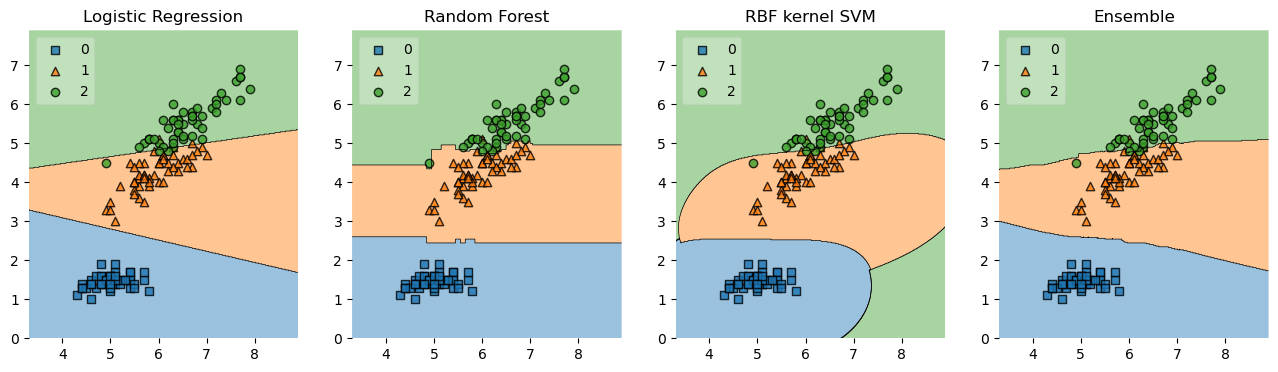

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

clf1 = LogisticRegression(random_state=0,
                          solver='lbfgs', multi_class='auto')
clf2 = RandomForestClassifier(random_state=0, n_estimators=100)
clf3 = SVC(random_state=0, probability=True, gamma='auto')
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2,1,1],
                              voting='soft')

X,y = iris_data()
X = X[:, [0,2]]

gs = gridspec.GridSpec(1,4)
fig = plt.figure(figsize=(16,4))

for clf, lab, grd in zip(
    [clf1, clf2, clf3, eclf],
    ['Logistic Regression', 'Random Forest',
     'RBF kernel SVM', 'Ensemble'],
     itertools.product([0,1], repeat=2)):
    clf.fit(X,y)
    ax = plt.subplot(gs[0, grd[0]*2+grd[1]])
    fig = plot_decision_regions(X=X,y=y,clf=clf, legend=2)
    plt.title(lab)
plt.show()

# 赛题-模型融合

# 赛题整体情况

## 01 导包

In [1]:
## -------------------------------------------------------
## --导包-------------------------------------------------
## -------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # mse

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import SGDRegressor


## 02 读取数据

In [9]:
## -------------------------------------------------------
## --读取数据----------------------------------------------
## -------------------------------------------------------
train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"
train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data  = pd.read_csv(test_data_file,  sep='\t', encoding='utf-8')


## 03 数据查看

In [36]:
df = pd.DataFrame({
    'v1-categorical features': ['a','b','c','d','e','f'],
    'v2-numerical features':   [ 1,  2,  3,  4,  5,  6]
})
df.head(n=2)


v1-categorical features  v2-numerical features
0                       a                      1
1                       b                      2

### 03-1 定性特征哑编码

categorical features

OneHotEncoder (注意特征维度爆炸的风险)

OrdinalEncoder

In [38]:
'''工业蒸汽的例子中，全部是 定量特征
而 定性特征，可以使用OneHotEncoder进行处理
举例而言，“教育程度” 是个定性特征，其包括[初中,高中,大学]
OneHotEncoder的做法是，把这1个特征，转为3个特征（是否初中，是否高中，是否大学）

Dataset中原本的1列会被扩充成3列，每一列的值只有0或1
'''

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# create a sample dataframe with categorical variables
df = pd.DataFrame({'color': ['red', 'blue', 'green'], 
                   'shape': ['square', 'circle', 'triangle']})

display(df)

# create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# fit and transform the data using the encoder
one_hot_data = encoder.fit_transform(df[['color', 'shape']])

# convert the one-hot encoded data to a pandas dataframe
one_hot_df = pd.DataFrame(one_hot_data.toarray(), columns=encoder.get_feature_names_out())

# concatenate the one-hot encoded dataframe with the original dataframe
df1 = pd.concat([df, one_hot_df], axis=1)

# print the resulting dataframe
display(df1)

'''OrdinalEncoder是另一种方式，比如一个类别的可能结果是 [b,c,a]
OrdinalEncoder会先进行字母排序，然后赋予从0开始的顺序值，[1,2,0]
'''
# create an instance of the OrdinalEncoder class
encoder = OrdinalEncoder()

# fit and transform the data using the encoder
encoded_data = encoder.fit_transform(df[['color', 'shape']])

# convert the encoded data to a pandas dataframe
encoded_df = pd.DataFrame(encoded_data, columns=['color_encoded', 'shape_encoded'])

# concatenate the encoded dataframe with the original dataframe
df2 = pd.concat([df, encoded_df], axis=1)

# print the resulting dataframe
display(df2)

color     shape
0    red    square
1   blue    circle
2  green  triangle

color     shape  color_blue  color_green  color_red  shape_circle  \
0    red    square         0.0          0.0        1.0           0.0   
1   blue    circle         1.0          0.0        0.0           1.0   
2  green  triangle         0.0          1.0        0.0           0.0   

   shape_square  shape_triangle  
0           1.0             0.0  
1           0.0             0.0  
2           0.0             1.0

color     shape  color_encoded  shape_encoded
0    red    square            2.0            1.0
1   blue    circle            0.0            0.0
2  green  triangle            1.0            2.0

### 03-2 缺失值

In [10]:
'''info() 用于查看各特征及标签有无缺失'''
# display(train_data.info())
# display(test_data.info())

'''DF的isnull方法'''
print(train_data.isnull().sum())

'''List wise deletion 有缺失的行全删除'''
# df1.dropna(axis=0,how='all') # 全是NA的行才删
# df1.dropna(axis=0,how='any') #   有NA的行就删

'''---------------------------------------------------------------------------------'''

# train_data.describe()
# test_data.describe()

# train_data.head() # 显示前5行
# test_data.head()

'''该案例没有缺失值，下面以Iris数据集，人为添加缺失数据，随后进行处理'''
from numpy import vstack, array, nan
from sklearn.impute import SimpleImputer

from sklearn.datasets import load_iris
iris = load_iris()

old_data = pd.DataFrame(vstack((array([nan,nan,nan,nan]), iris.data) ),columns=iris.feature_names)

new_data = pd.DataFrame(SimpleImputer(missing_values=nan, strategy='mean').fit_transform(old_data), 
                               columns=iris.feature_names)
# print(new_data.head())
display(old_data.head())
display(new_data.head()) # 可以看到第一行的nan被换成了数据，这些数据就是各列的mean

V0        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
target    0
dtype: int64


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                NaN               NaN                NaN               NaN
1                5.1               3.5                1.4               0.2
2                4.9               3.0                1.4               0.2
3                4.7               3.2                1.3               0.2
4                4.6               3.1                1.5               0.2

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.843333          3.057333              3.758          1.199333
1           5.100000          3.500000              1.400          0.200000
2           4.900000          3.000000              1.400          0.200000
3           4.700000          3.200000              1.300          0.200000
4           4.600000          3.100000              1.500          0.200000

### 03-3 异常值

In [1]:
## --------------------------------------------------------------------- ##
## ------------------异常值分析------------------------------------------ ##
## --------------------------------------------------------------------- ##

'''Boxplot, 查看各个特征的可能异常值'''
plt.figure(figsize=(18,10))
plt.subplot(211)
plt.boxplot(x=train_data.values, labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
'''结合经验进行调整，下述删除是整行删除'''
# V9变量的outlier明显，有很多小于-7.5的数据，把这些数据删除
train_data = train_data[train_data['V9']>-7.5]
test_data = test_data[test_data['V9']>-7.5]

NameError: name 'plt' is not defined

## 04 特征工程

test

test2